# Cyclistic-Case-Study



# Introdution

The bike share analysis case study presented here brings the real world scenario of the nature of bike riders, i.e. Annual member riders or Subscribers and non-member or Casual riders in Chicago. Data for this analysis has been provided by Motivate International Inc. for 692 stations across Chicago and is a part of Course work of Google Data Analytics Certificate. This case study is given by Google through     
E-learning coursera.

Google has given us the six stages of being a data analyst. The stages are;

- Ask
- prepare
- process
- Analyze
- Share
- Act

These stages would be applied in this case study.

# ASK

The main goal of this work is to ensure design marketing strategies that would convert casual riders into annual members by analyzing their wages. Therefore, the focus will be centered on the nature of bike riders for a period of 18 months. The reason behind this was that, company found annual members to be more profitable than casual riders.

Key Tasks:

1- Identify the business task.

2- Consider key stakeholders

# PREPARE

The data was available to be downloaded from the official site of Kaggle. I will be using Python programming language to access and analyze the data.

Key Tasks:
- Download data and store it appropriately.
- Identify how it’s organized.
- Sort and filter the data.

In [ ]:
# Importning necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Importing the dataset

!pip install opendatasets --upgrade --quiet
import opendatasets as od
download_url = 'https://www.kaggle.com/diegopinedaperez/google-data-analytics-capstone-case-study-1?select=final_tripdata.csv' 
od.download(download_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: salilsharma1901
Your Kaggle Key: ··········


100%|██████████| 336M/336M [00:03<00:00, 90.6MB/s]


In [ ]:
# Reading the imported csv dataset using pandas.

df = pd.read_csv('./google-data-analytics-capstone-case-study-1/final_tripdata.csv')
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,41.894503,-87.617854,41.857499,-87.646277,member,5.0,3011.0,46660.08
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,41.953393,-87.732002,41.961080,-87.735690,member,2.0,7291.0,8525.92
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,41.977997,-87.668047,41.926277,-87.630834,member,4.0,7055.0,63716.35
5515092,FFFFFF0C829D3E7A,electric_bike,2021-05-03 17:04:08,2021-05-03 17:46:11,Clark St & Lake St,KA1503000012,Harper Ave & 59th St,KA1503000070,41.884823,-87.630814,41.787892,-87.588183,member,2.0,4203.0,105891.78


## Data Cleaning

This stage is to clean the data and make it availble for analysis to get our recommendations at the act stages.

In [ ]:
# We know that, duration cannot be negative. So, lets drop any negative values from duration column.

df.drop(df.index[df['duration'] <= 0],inplace =True)

In [ ]:
# We know that, distance cannot be negative. So, lets drop any negative values from distance column.

df.drop(df.index[df['distance'] <= 0],inplace =True)

In [ ]:
# We can see that there are some NaN values. Lets drop them.

df.dropna()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,41.961406,-87.676169,41.920771,-87.663712,casual,4.0,1824.0,42501.53
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,41.878261,-87.641155,41.891495,-87.648179,member,3.0,619.0,14982.48
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,41.949399,-87.654529,41.929567,-87.707857,casual,7.0,10808.0,56896.25
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,41.881900,-87.648800,41.912100,-87.634700,member,7.0,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,41.889899,-87.671473,41.885483,-87.652305,member,4.0,903.0,19670.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5515088,FFFFFB64C697B86A,docked_bike,2020-10-07 16:10:01,2020-10-07 16:45:28,Lake Shore Dr & Wellington Ave,157,Ashland Ave & Division St,210,41.936688,-87.636829,41.903450,-87.667747,member,4.0,3527.0,45394.79
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,41.894503,-87.617854,41.857499,-87.646277,member,5.0,3011.0,46660.08
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,41.953393,-87.732002,41.961080,-87.735690,member,2.0,7291.0,8525.92
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,41.977997,-87.668047,41.926277,-87.630834,member,4.0,7055.0,63716.35


In [ ]:
# In the data, We can see the day_week_start column that the values are in number of the days of the week. 
# We can replace them with the real name of days for easy understanding.

df['day_week_start'].replace(
    {1.0:'sunday',2.0:'monday',3.0:'tuesday',4.0:'wednesday',5.0:'thursday',6.0:'friday',7.0:'saturday'},inplace = True)

In [ ]:
# We can remove four columns from dataset which are: start_lat, end_lat, start_lng, end_lng as we already have data of distance.

newdf = df.drop(['start_lat','start_lng','end_lat','end_lng'],axis = 1)
newdf_casual = df.drop(['start_lat','start_lng','end_lat','end_lng'],axis = 1)
df = df.drop(['start_lat','start_lng','end_lat','end_lng'],axis = 1)

# PROCESS

The process stage is to ensure that the data is ready for analysis.

Key Tasks:
- Check the data for errors.
- Choose your tools.
- Transform the data so you can work with it effectively.
- Document the cleaning process.

In [ ]:
newdff = newdf.dropna()

In [ ]:
newdff_casual = newdf_casual.dropna()

In [ ]:
dff = df.dropna()

The Data is ready for analysis.

# ANALYZE

This stage is one of the fun stages where we will uncover the secrets of our data.

Key Tasks:
- Aggregate your data so it’s useful and accessible.
- Organize and format your data.
- Perform calculations.
- Identify trends and relationships.

In [ ]:
# Lets see some of the statistics of our clean dataset.

newdff.describe()

,duration,distance
count,4.685565e+06,4.685565e+06
mean,5.644010e+04,2.369751e+04
std,1.538609e+07,1.876522e+04
min,1.000000e+00,1.000000e-02
25%,8.020000e+02,1.074132e+04
50%,1.586000e+03,1.844213e+04
75%,5.121000e+03,3.146654e+04
max,8.875942e+09,4.494231e+05


In [ ]:
# Lets check the number of casual riders and the members

newdff['member_casual'].value_counts()

member    2917439
casual    1768126
Name: member_casual, dtype: int64

There are 2,917,439 members:- 62.26%

There are 1,768,126 casual riders:- 37.74%

In [ ]:
newdff['start_station_name'].value_counts()

Streeter Dr & Grand Ave            53336
Clark St & Elm St                  43893
Lake Shore Dr & North Blvd         38252
Lake Shore Dr & Monroe St          38184
Wells St & Concord Ln              37816
                                   ...  
W 103rd St & S Avers Ave               3
N Clark St & W Elm St                  1
Lyft Driver Center Private Rack        1
N Hampden Ct & W Diversey Ave          1
HQ QR                                  1
Name: start_station_name, Length: 715, dtype: int64

We can see that, Streeter Dr & Grand Ave is the most visited station. Total 53336 users started with this station in past year

In [ ]:
newdff['end_station_name'].value_counts()

Streeter Dr & Grand Ave          56545
Clark St & Elm St                43956
Lake Shore Dr & North Blvd       40798
Theater on the Lake              39712
Wells St & Concord Ln            38637
                                 ...  
N Damen Ave & W Wabansia St          2
N Clark St & W Elm St                2
N Hampden Ct & W Diversey Ave        1
Avenue L & 114th St                  1
HQ QR                                1
Name: end_station_name, Length: 716, dtype: int64

We can see that, Streeter Dr & Grand Ave is the most visited station. Total 56545 users ended at this station in past year

In [ ]:
newdff['rideable_type'].value_counts()

docked_bike      2776356
classic_bike     1205865
electric_bike     703344
Name: rideable_type, dtype: int64

The most used bikes:

2,776,356 users rode the docked_bike:- 59.25%

1,205,865 users rode the classic_bike:- 25.73%

703,344 users rode the electric_bike:- 15.02%

In [ ]:
newdff['day_week_start'].value_counts()

saturday     833136
sunday       706254
friday       686002
wednesday    641247
thursday     621602
tuesday      615493
monday       581831
Name: day_week_start, dtype: int64

On Saturday, highest number of users rode bikes. 

In [ ]:
newdff.drop(newdff.index[newdff['member_casual'] == 'casual'],inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
newdff_casual.drop(newdff_casual.index[newdff_casual['member_casual'] == 'member'],inplace =True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Annual members dataset

newdff

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance
1,000002EBE159AE82,electric_bike,2021-06-22 17:25:15,2021-06-22 17:31:34,Clinton St & Jackson Blvd,638,Milwaukee Ave & Grand Ave,13033,member,tuesday,619.0,14982.48
3,0000127970C84F62,docked_bike,2020-05-30 06:36:36,2020-05-30 06:55:28,Green St & Madison St,198,Wells St & Concord Ln,289,member,saturday,1892.0,33329.42
4,00001A81D056B01B,classic_bike,2021-04-14 08:10:11,2021-04-14 08:19:14,Wood St & Hubbard St,13432,Morgan St & Lake St,TA1306000015,member,wednesday,903.0,19670.18
6,00001E17DEF40948,docked_bike,2020-07-08 21:45:01,2020-07-08 21:57:57,Wabash Ave & Roosevelt Rd,59,Indiana Ave & 26th St,147,member,wednesday,1256.0,21819.30
8,000027AD78DF9CE8,docked_bike,2020-06-27 22:35:16,2020-06-27 22:46:41,Halsted St & Wrightwood Ave,349,Pine Grove Ave & Waveland Ave,232,member,saturday,1125.0,20942.98
...,...,...,...,...,...,...,...,...,...,...,...,...
5515088,FFFFFB64C697B86A,docked_bike,2020-10-07 16:10:01,2020-10-07 16:45:28,Lake Shore Dr & Wellington Ave,157,Ashland Ave & Division St,210,member,wednesday,3527.0,45394.79
5515089,FFFFFB6DD39792F1,docked_bike,2020-08-27 16:13:13,2020-08-27 16:43:24,McClurg Ct & Erie St,142,Halsted St & 18th St,202,member,thursday,3011.0,46660.08
5515090,FFFFFBF105061B9E,docked_bike,2020-06-15 08:52:25,2020-06-15 09:25:16,Avondale Ave & Irving Park Rd,483,Kildare Ave & Montrose Ave,630,member,monday,7291.0,8525.92
5515091,FFFFFC1045B11550,classic_bike,2021-03-03 13:42:58,2021-03-03 14:13:13,Clark St & Berwyn Ave,KA1504000146,Theater on the Lake,TA1308000001,member,wednesday,7055.0,63716.35


In [ ]:
# Casual riders dataset

newdff_casual

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,day_week_start,duration,distance
0,000001004784CD35,docked_bike,2020-07-22 15:38:23,2020-07-22 15:56:47,Wolcott (Ravenswood) Ave & Montrose Ave,238,Southport Ave & Clybourn Ave,307,casual,wednesday,1824.0,42501.53
2,00000550C665101A,docked_bike,2020-06-06 15:20:01,2020-06-06 16:28:09,Sheffield Ave & Waveland Ave,114,Kedzie Ave & Milwaukee Ave,260,casual,saturday,10808.0,56896.25
5,00001DCF2BC423F4,docked_bike,2021-06-13 12:00:49,2021-06-13 12:29:51,Millennium Park,13008,Fort Dearborn Dr & 31st St,TA1307000048,casual,sunday,2902.0,45342.48
7,00002279D7D315A5,docked_bike,2020-09-26 15:19:31,2020-09-26 15:44:07,Aberdeen St & Monroe St,80,Rush St & Superior St,161,casual,saturday,2476.0,33351.16
10,0000376F8A298CB2,docked_bike,2020-08-14 19:10:02,2020-08-14 19:38:20,Clark St & Lake St,38,Michigan Ave & 18th St,273,casual,friday,2818.0,28907.67
...,...,...,...,...,...,...,...,...,...,...,...,...
5515081,FFFFDF0328F6004D,classic_bike,2021-04-30 23:28:46,2021-04-30 23:33:14,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,casual,friday,468.0,12095.02
5515083,FFFFE1F4CF59EB3F,electric_bike,2021-03-21 14:12:29,2021-03-21 14:31:03,Streeter Dr & Grand Ave,13022,Theater on the Lake,TA1308000001,casual,sunday,1874.0,38739.86
5515084,FFFFED44E3157BF7,docked_bike,2020-08-19 19:28:11,2020-08-19 20:42:16,May St & Taylor St,22,May St & Taylor St,22,casual,wednesday,11405.0,0.41
5515086,FFFFEDAAB98A2B5B,classic_bike,2021-05-26 14:08:24,2021-05-26 16:03:25,Daley Center Plaza,TA1306000010,Streeter Dr & Grand Ave,13022,casual,wednesday,19501.0,19340.03


In [ ]:
# Lets have a look at statistics of annual members

newdff.describe()

,duration,distance
count,2.917439e+06,2.917439e+06
mean,2.552066e+04,2.298572e+04
std,1.163140e+07,1.781781e+04
min,1.000000e+00,1.000000e-02
25%,6.750000e+02,1.037690e+04
50%,1.224000e+03,1.777553e+04
75%,3.271000e+03,3.051190e+04
max,8.869776e+09,4.494231e+05


In [ ]:
# Lets have a look at statistics of casual riders

newdff_casual.describe()

,duration,distance
count,1.768126e+06,1.768126e+06
mean,1.074577e+05,2.487198e+04
std,2.010248e+07,2.017689e+04
min,1.000000e+00,1.000000e-02
25%,1.196000e+03,1.149538e+04
50%,2.543000e+03,1.971238e+04
75%,6.790000e+03,3.296709e+04
max,8.875942e+09,3.042953e+05


In [ ]:
newdff['rideable_type'].value_counts()

docked_bike      1727733
classic_bike      792599
electric_bike     397107
Name: rideable_type, dtype: int64

Bikes riden by members only:-

docked_bike was 1,727,733 members:- 59.22%

classic_bike was 792,599 members:- 27.17%

electric_bike was 397,107 members:- 13.61%

In [ ]:
newdff_casual['rideable_type'].value_counts()

docked_bike      1048623
classic_bike      413266
electric_bike     306237
Name: rideable_type, dtype: int64

Bikes riden by casual riders only:-

docked_bike was 1,048,623 Casual:- 59.31%

classic_bike was 413,266 Casual:- 23.37%

electric_bike was 306,237 Casual:- 17.32%

In [ ]:
# Lets check the data of starting station used by annual members.

newdff['start_station_name'].value_counts()

Clark St & Elm St                28492
Kingsbury St & Kinzie St         24650
Wells St & Concord Ln            23030
Dearborn St & Erie St            22423
St. Clair St & Erie St           22228
                                 ...  
Major Taylor Trail & 124th St        1
N Hampden Ct & W Diversey Ave        1
Elizabeth St & 92nd St               1
Avenue O & 118th St                  1
Loomis St & 89th St                  1
Name: start_station_name, Length: 706, dtype: int64

In [ ]:
# Lets check the data of starting station used by casual riders.

newdff_casual['start_station_name'].value_counts()

Streeter Dr & Grand Ave       39555
Millennium Park               26701
Lake Shore Dr & Monroe St     25950
Michigan Ave & Oak St         20887
Lake Shore Dr & North Blvd    19380
                              ...  
W 103rd St & S Avers Ave          3
Hampden Ct & Diversey Ave         3
N Clark St & W Elm St             1
HQ QR                             1
Stewart Ave & 63rd St (*)         1
Name: start_station_name, Length: 712, dtype: int64

In [ ]:
# Lets check the data of ending station used by annual members.

newdff['end_station_name'].value_counts()

Clark St & Elm St           29235
Kingsbury St & Kinzie St    24892
St. Clair St & Erie St      23893
Wells St & Concord Ln       23554
Dearborn St & Erie St       23346
                            ...  
N Clark St & W Elm St           1
Ashland Ave & 73rd St           1
Halsted St & 104th St           1
Avenue O & 134th St             1
Yates Blvd & 93rd St            1
Name: end_station_name, Length: 709, dtype: int64

In [ ]:
#  Lets check the data of ending station used by casual riders.

newdff_casual['end_station_name'].value_counts()

Streeter Dr & Grand Ave                             43370
Millennium Park                                     28405
Lake Shore Dr & Monroe St                           24336
Lake Shore Dr & North Blvd                          22059
Michigan Ave & Oak St                               22038
                                                    ...  
Woodlawn & 103rd - Olive Harvey Vaccination Site        3
Eggleston Ave & 69th St (*)                             2
N Clark St & W Elm St                                   1
Avenue L & 114th St                                     1
N Hampden Ct & W Diversey Ave                           1
Name: end_station_name, Length: 714, dtype: int64

In [ ]:
newdff['day_week_start'].value_counts()

wednesday    447619
tuesday      431542
friday       430723
thursday     426599
saturday     419125
monday       396422
sunday       365409
Name: day_week_start, dtype: int64

Annual members love to ride during the weekdays.

In [ ]:
newdff_casual['day_week_start'].value_counts()

saturday     414011
sunday       340845
friday       255279
thursday     195003
wednesday    193628
monday       185409
tuesday      183951
Name: day_week_start, dtype: int64

Caual riders love riding on weekends.

# SHARE

This stage is useful for creating beautiful and interactive insights of the analyzed dataset. This is very useful when we are presenting our analysis to the stakeholders.

Key Tasks:

- Determine the best way to share your findings.
- Create effective data visualizations.
- Present your findings.
- Ensure your work is accessible.

In [ ]:
# Importing the data visualization library.

import matplotlib.pyplot as plt

In [ ]:
# Converting datetime to date.

from datetime import date
dff['started_at'] = pd.to_datetime(dff['started_at']).dt.normalize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Grouping the dates for barchart

by_date = pd.Series(dff['started_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_date = by_date.rename_axis('date').reset_index(name='counts')
df_date

,date,counts
0,2020-01-01,1979
1,2020-01-02,6300
2,2020-01-03,5753
3,2020-01-04,3083
4,2020-01-05,2879
...,...,...
540,2021-06-26,11138
541,2021-06-27,22521
542,2021-06-28,12717
543,2021-06-29,13867


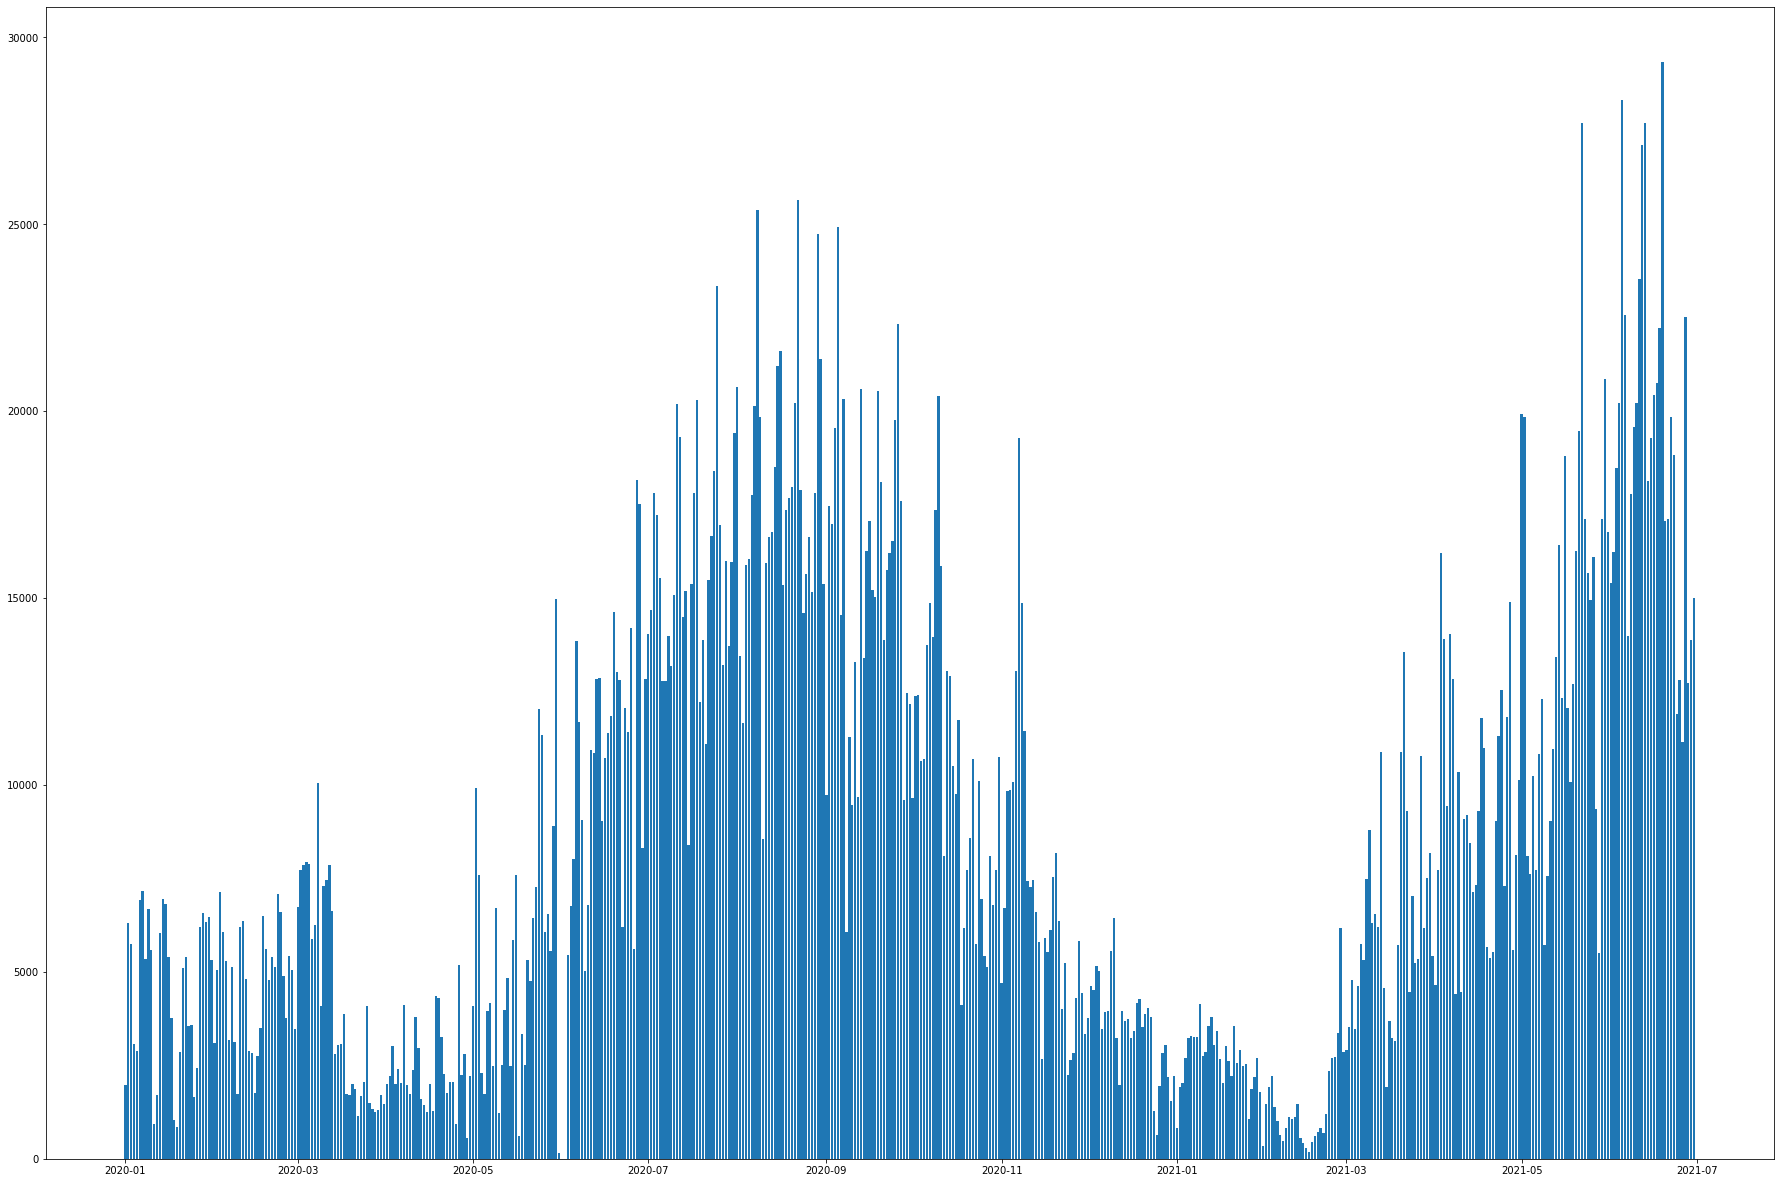

In [ ]:
# Start date of riding the bike for both Annual members and Casual riders

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [ ]:
# Converting datetime to date

dff['ended_at'] = pd.to_datetime(dff['ended_at']).dt.normalize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Grouping the date

by_date = pd.Series(dff['ended_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datei = by_date.rename_axis('date').reset_index(name='counts')
df_datei

,date,counts
0,2020-01-01,1965
1,2020-01-02,6298
2,2020-01-03,5757
3,2020-01-04,3080
4,2020-01-05,2873
...,...,...
551,2021-07-08,2
552,2021-07-09,4
553,2021-07-11,1
554,2021-07-12,2


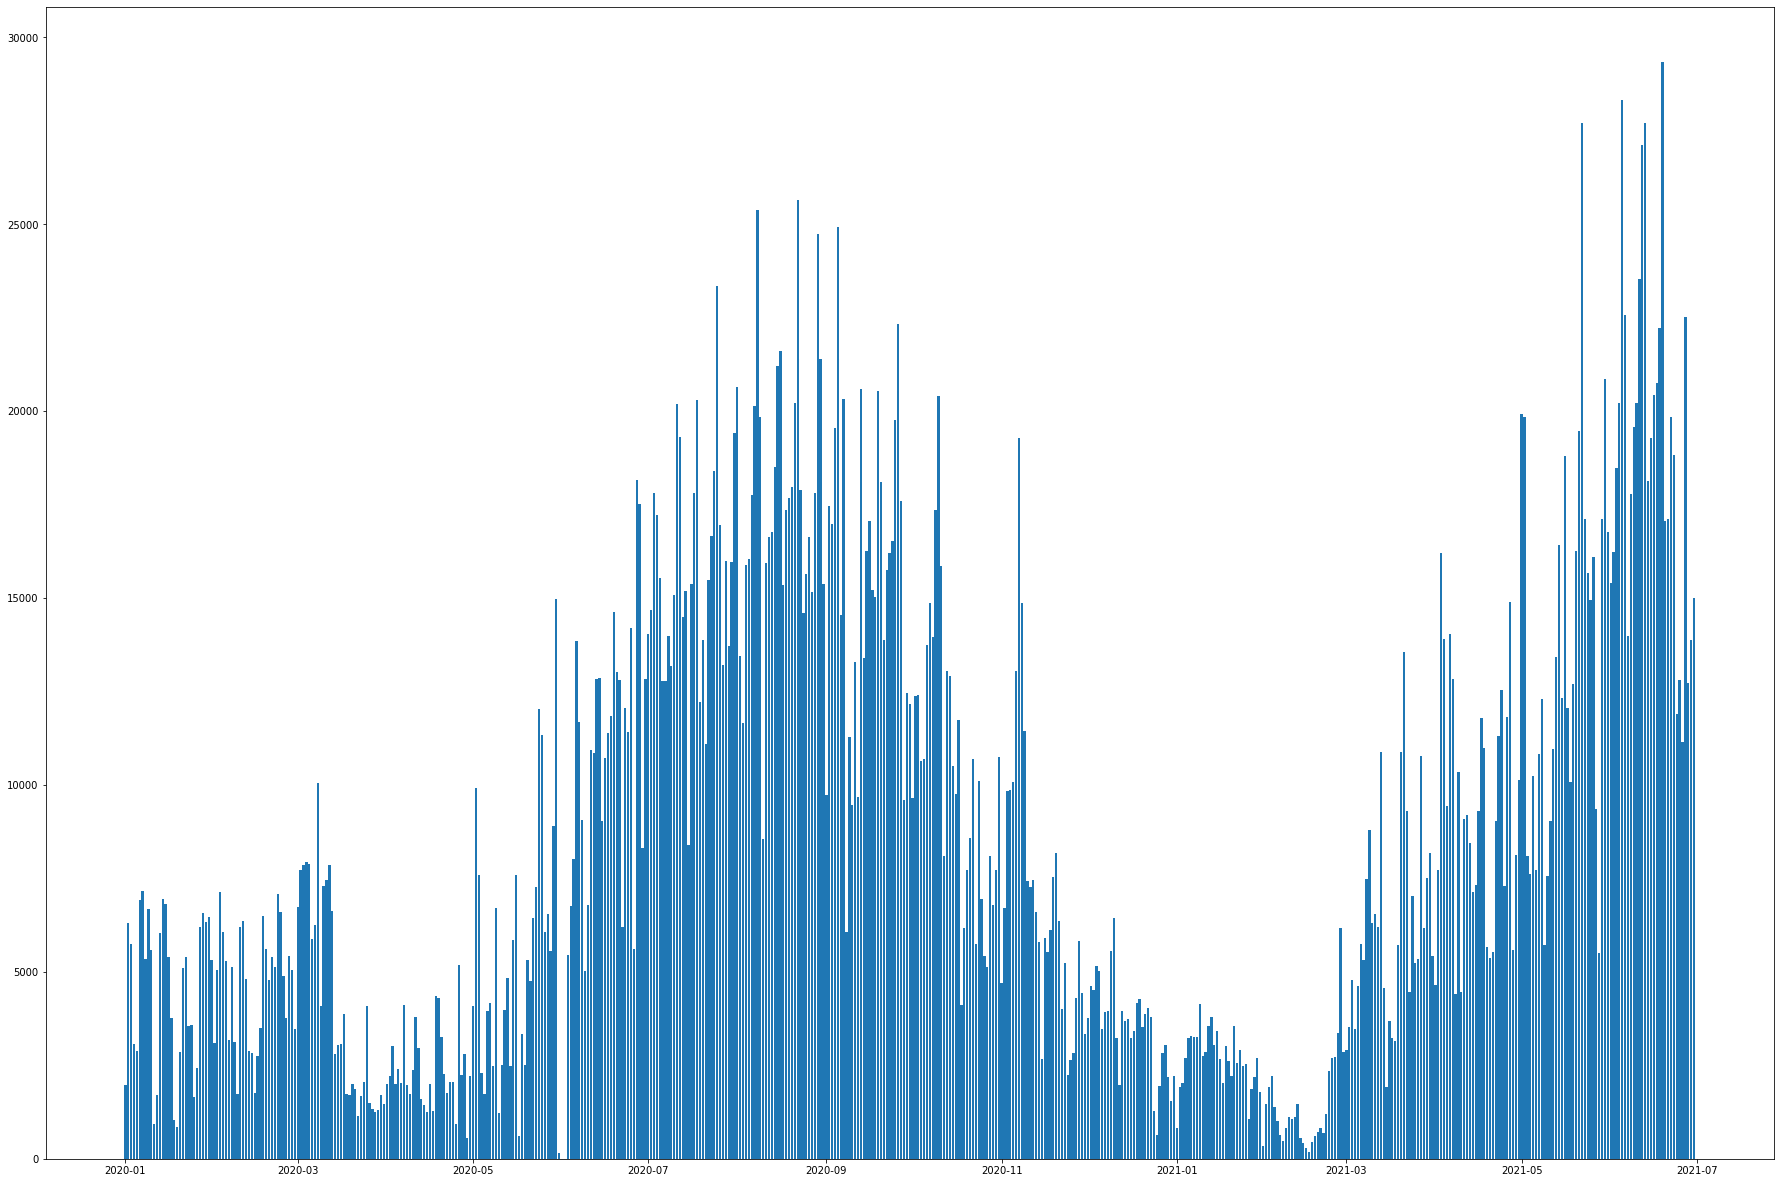

In [ ]:
# End date of riding the bike for both Annual members and Casual riders

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [ ]:
# Converting datetime to date for members only

newdff['started_at'] = pd.to_datetime(newdff['started_at']).dt.normalize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Grouping the date for members only

by_date = pd.Series(newdff['started_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datey = by_date.rename_axis('date').reset_index(name='counts')
df_datey

,date,counts
0,2020-01-01,1587
1,2020-01-02,5711
2,2020-01-03,5342
3,2020-01-04,2728
4,2020-01-05,2509
...,...,...
540,2021-06-26,5136
541,2021-06-27,9649
542,2021-06-28,7892
543,2021-06-29,8547


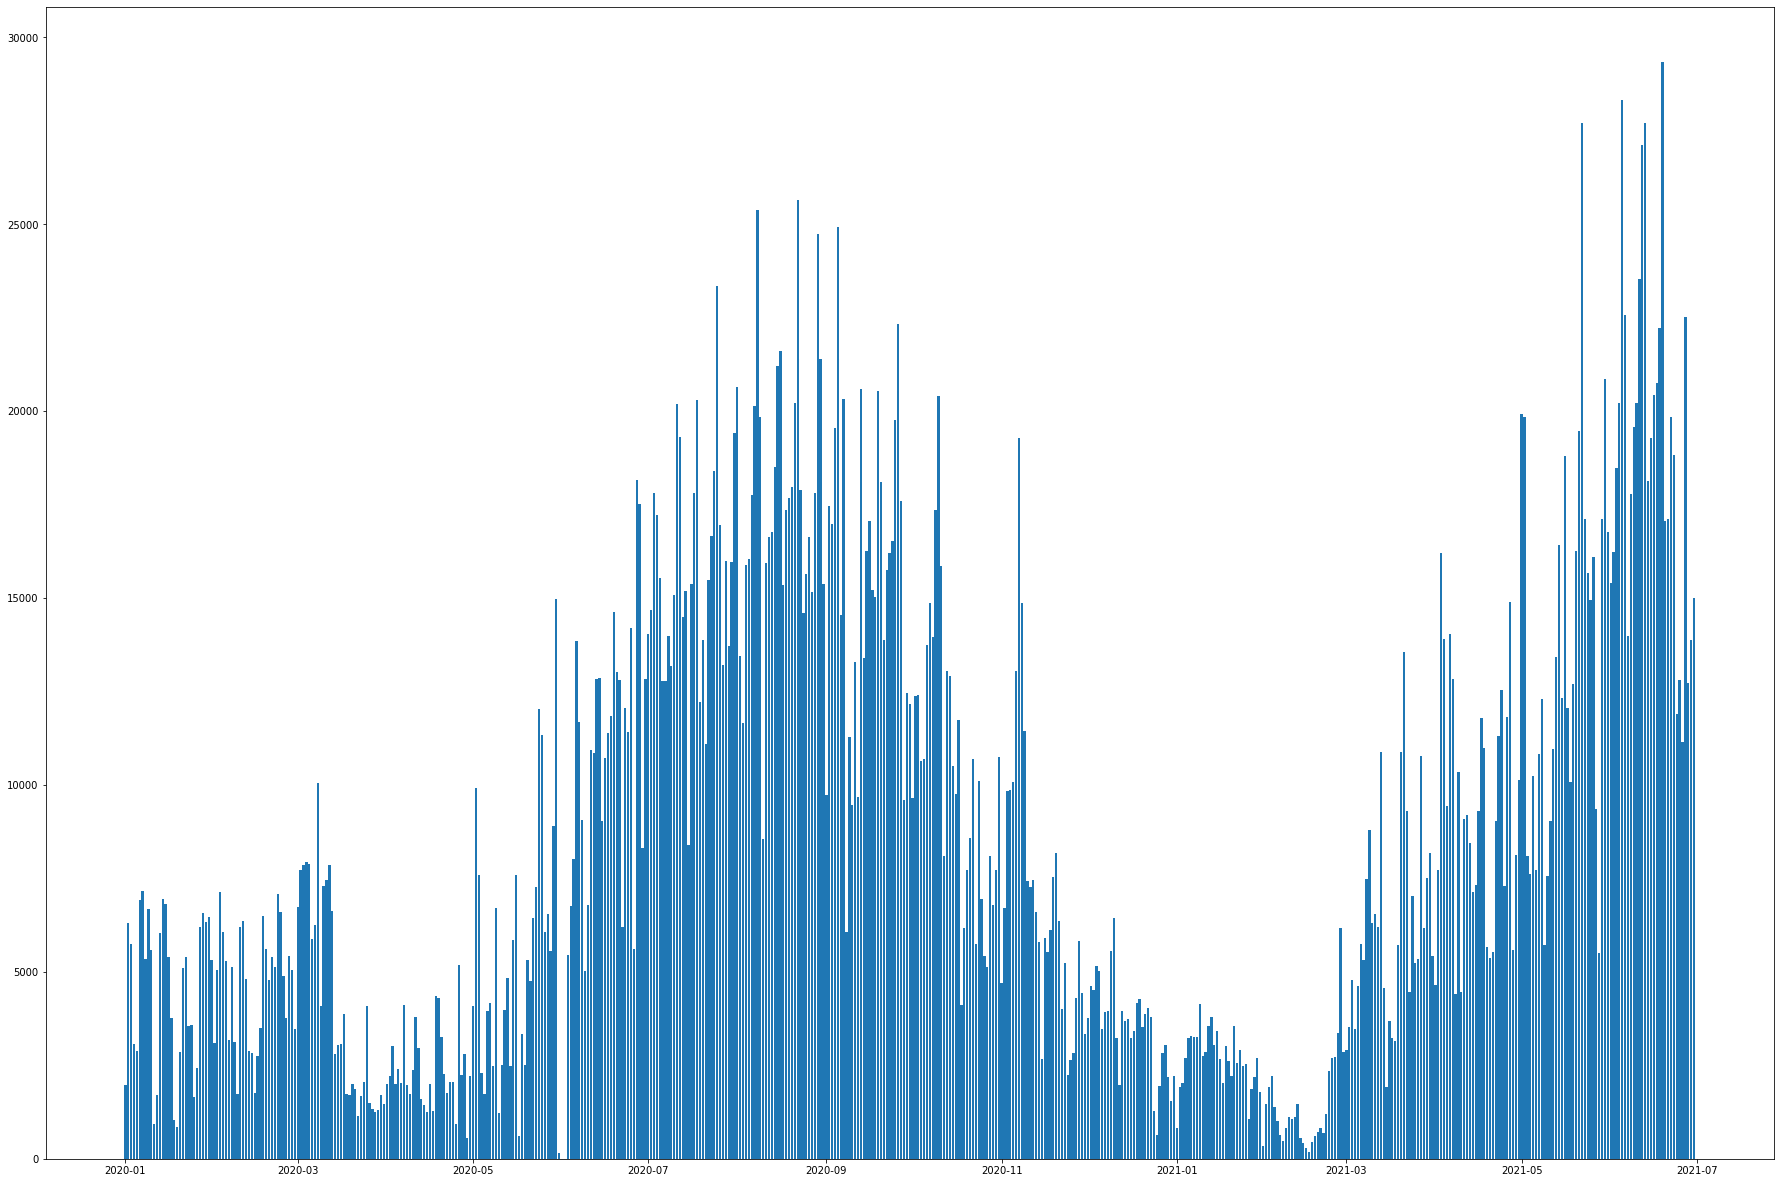

In [ ]:
# Start date of riding for members only

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [ ]:
# Converting datetime to date for members only

newdff['ended_at'] = pd.to_datetime(newdff['ended_at']).dt.normalize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Grouping the date for members only

by_date = pd.Series(newdff['ended_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_dater = by_date.rename_axis('date').reset_index(name='counts')
df_dater

,date,counts
0,2020-01-01,1583
1,2020-01-02,5710
2,2020-01-03,5343
3,2020-01-04,2727
4,2020-01-05,2506
...,...,...
541,2021-06-27,9668
542,2021-06-28,7899
543,2021-06-29,8541
544,2021-06-30,9494


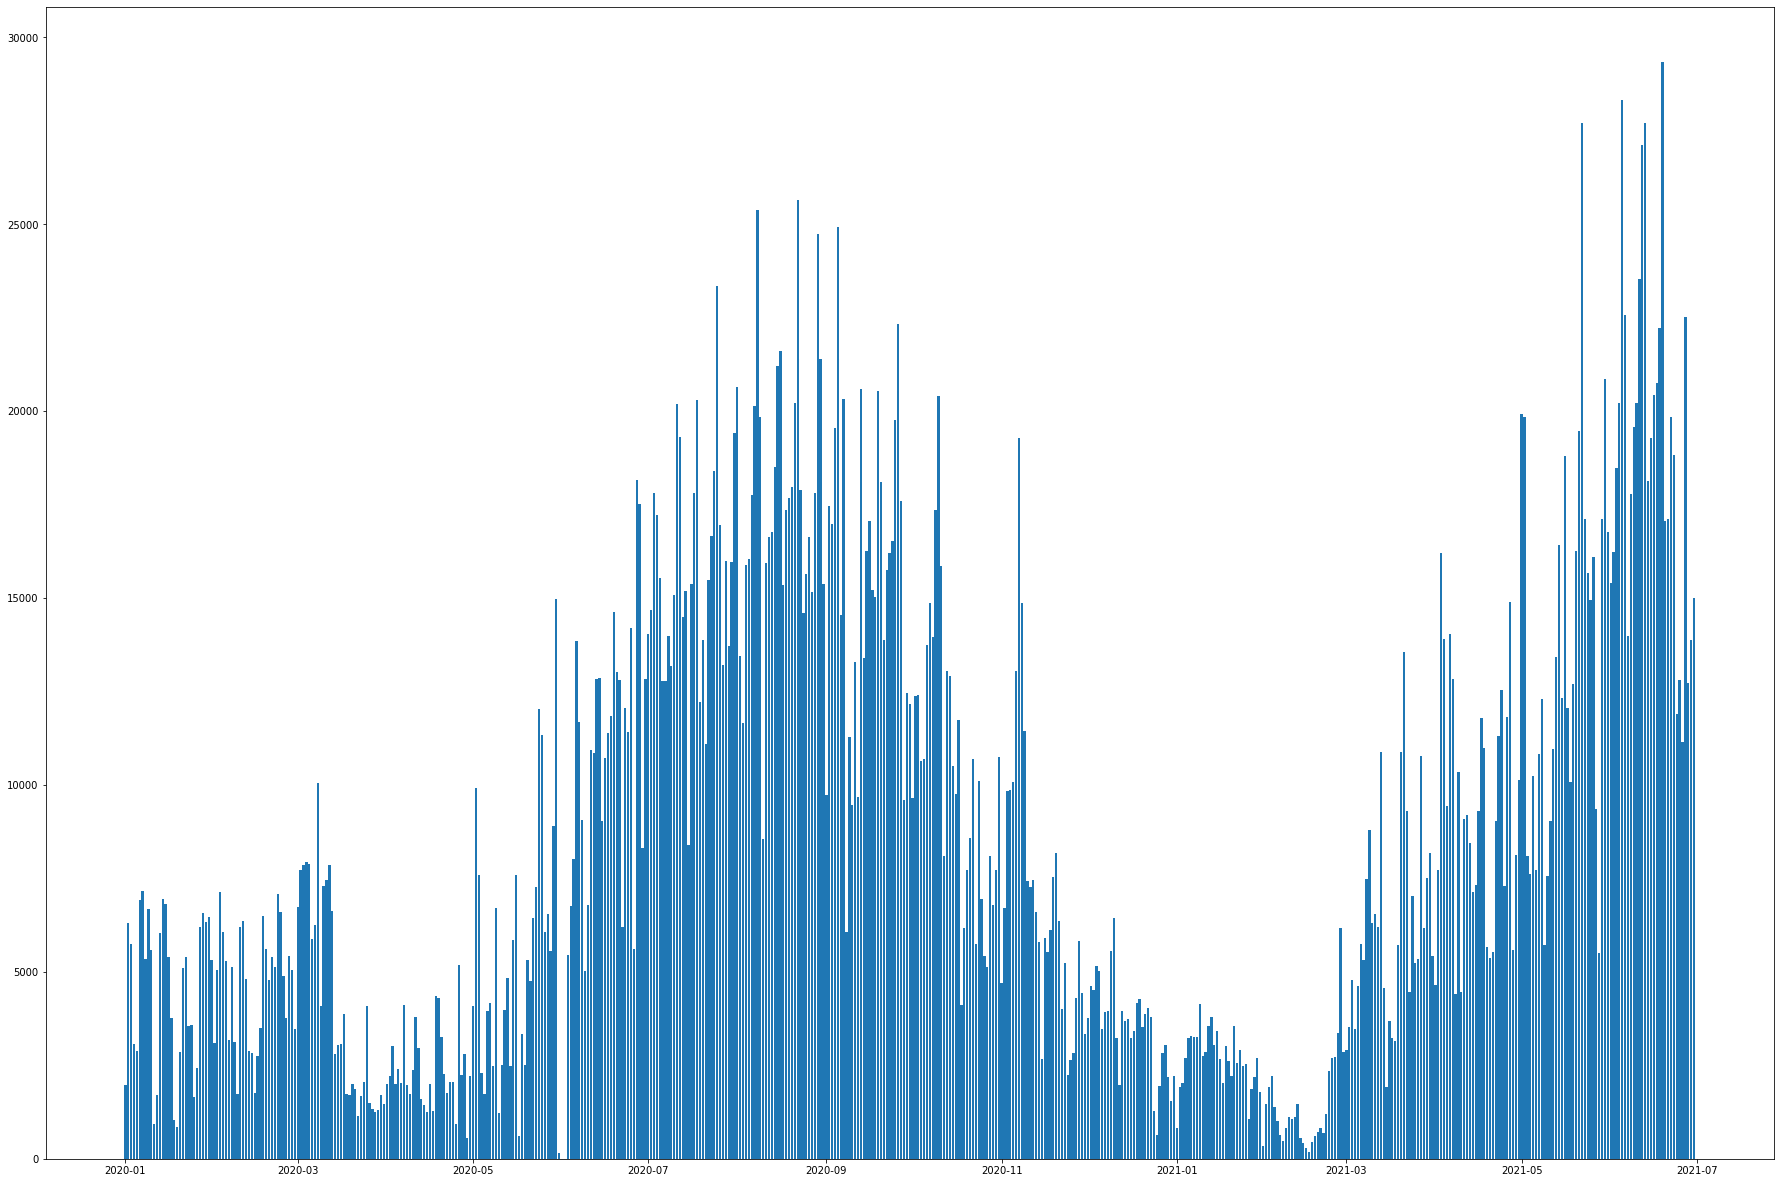

In [ ]:
# End date of riding for members only

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [ ]:
# Converting datetime to date for casual riders only

newdff_casual['started_at'] = pd.to_datetime(newdff_casual['started_at']).dt.normalize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Grouping the data

by_date = pd.Series(newdff_casual['started_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datex = by_date.rename_axis('date').reset_index(name='counts')
df_datex

,date,counts
0,2020-01-01,392
1,2020-01-02,589
2,2020-01-03,411
3,2020-01-04,355
4,2020-01-05,370
...,...,...
540,2021-06-26,6002
541,2021-06-27,12872
542,2021-06-28,4825
543,2021-06-29,5320


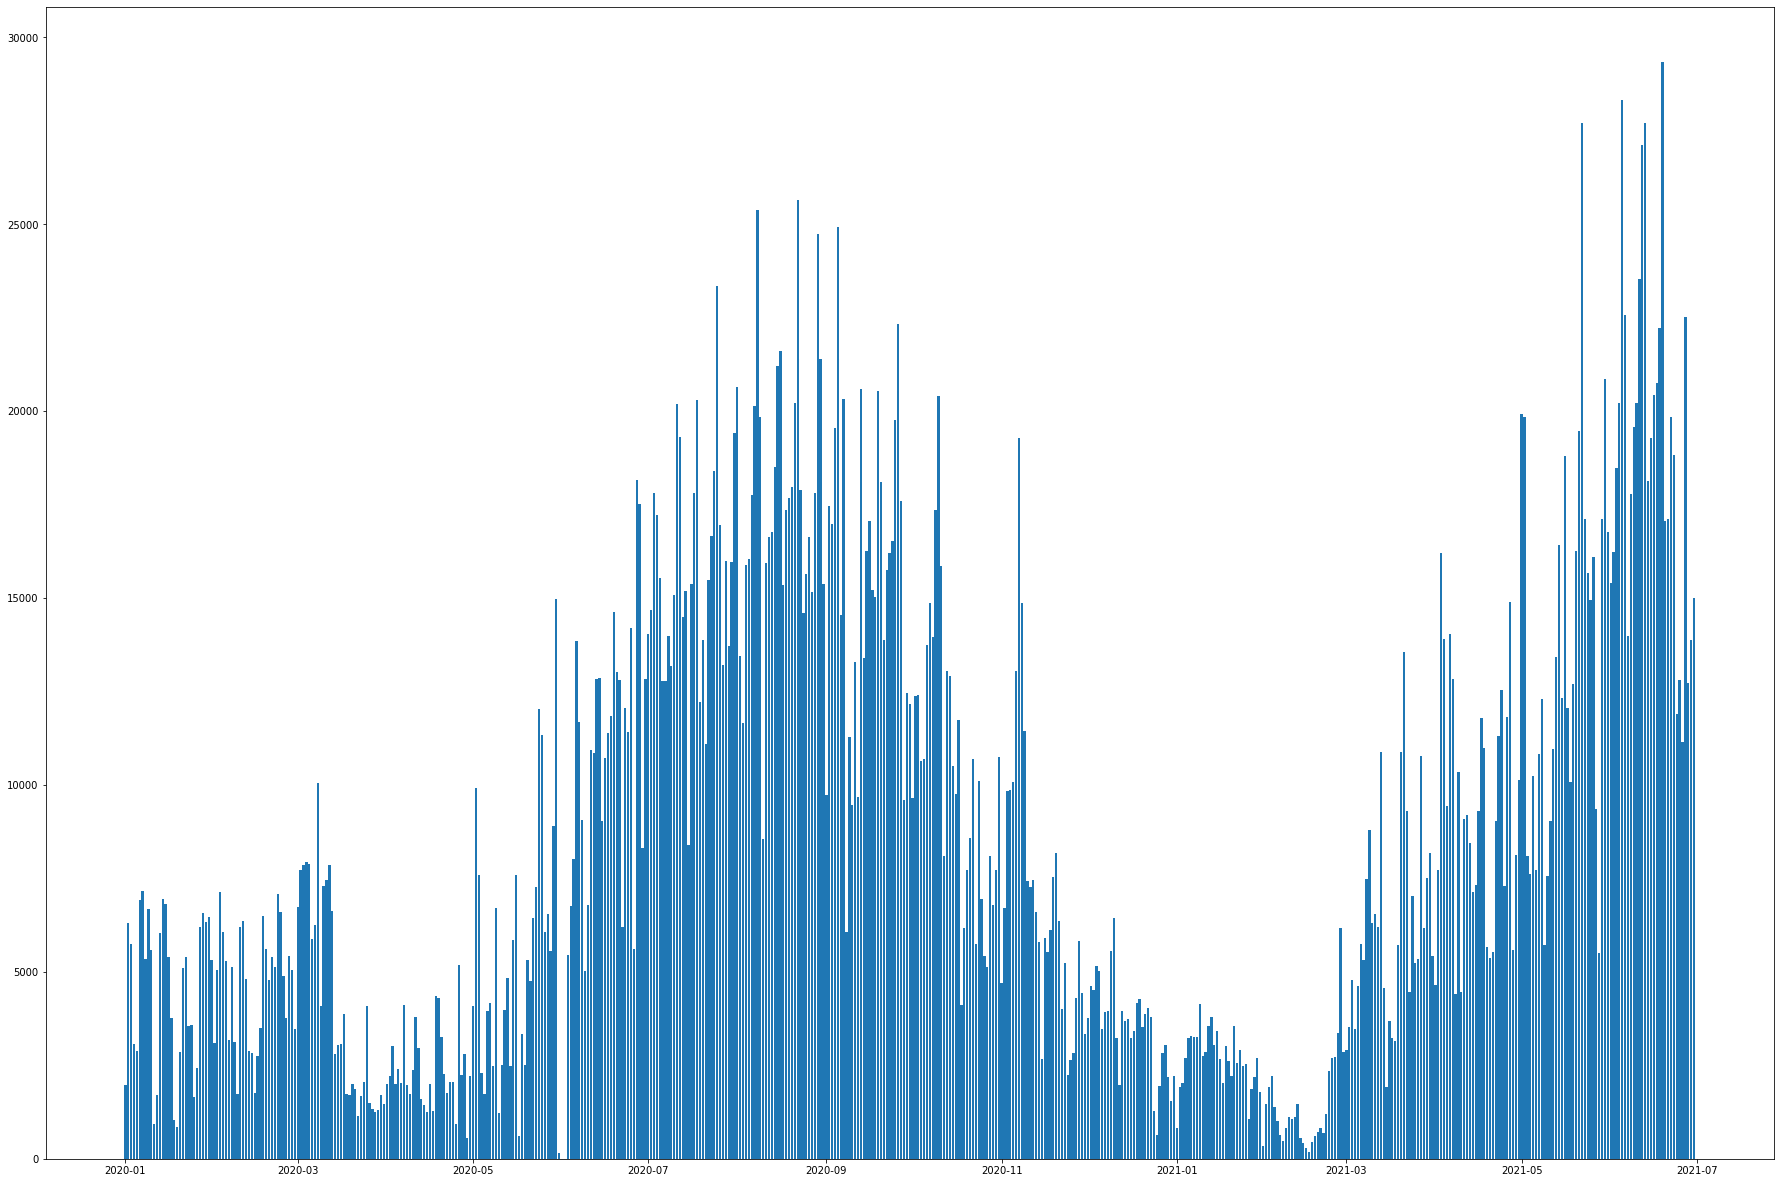

In [ ]:
# Start date of riding for casual riders only

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [ ]:
# Converting datetime to date for casual riders only

newdff_casual['ended_at'] = pd.to_datetime(newdff_casual['ended_at']).dt.normalize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Grouping the date

by_date = pd.Series(newdff_casual['ended_at']).value_counts().sort_index()
by_date.index = pd.DatetimeIndex(by_date.index)
df_datez = by_date.rename_axis('date').reset_index(name='counts')
df_datez

,date,counts
0,2020-01-01,382
1,2020-01-02,588
2,2020-01-03,414
3,2020-01-04,353
4,2020-01-05,367
...,...,...
551,2021-07-08,2
552,2021-07-09,4
553,2021-07-11,1
554,2021-07-12,2


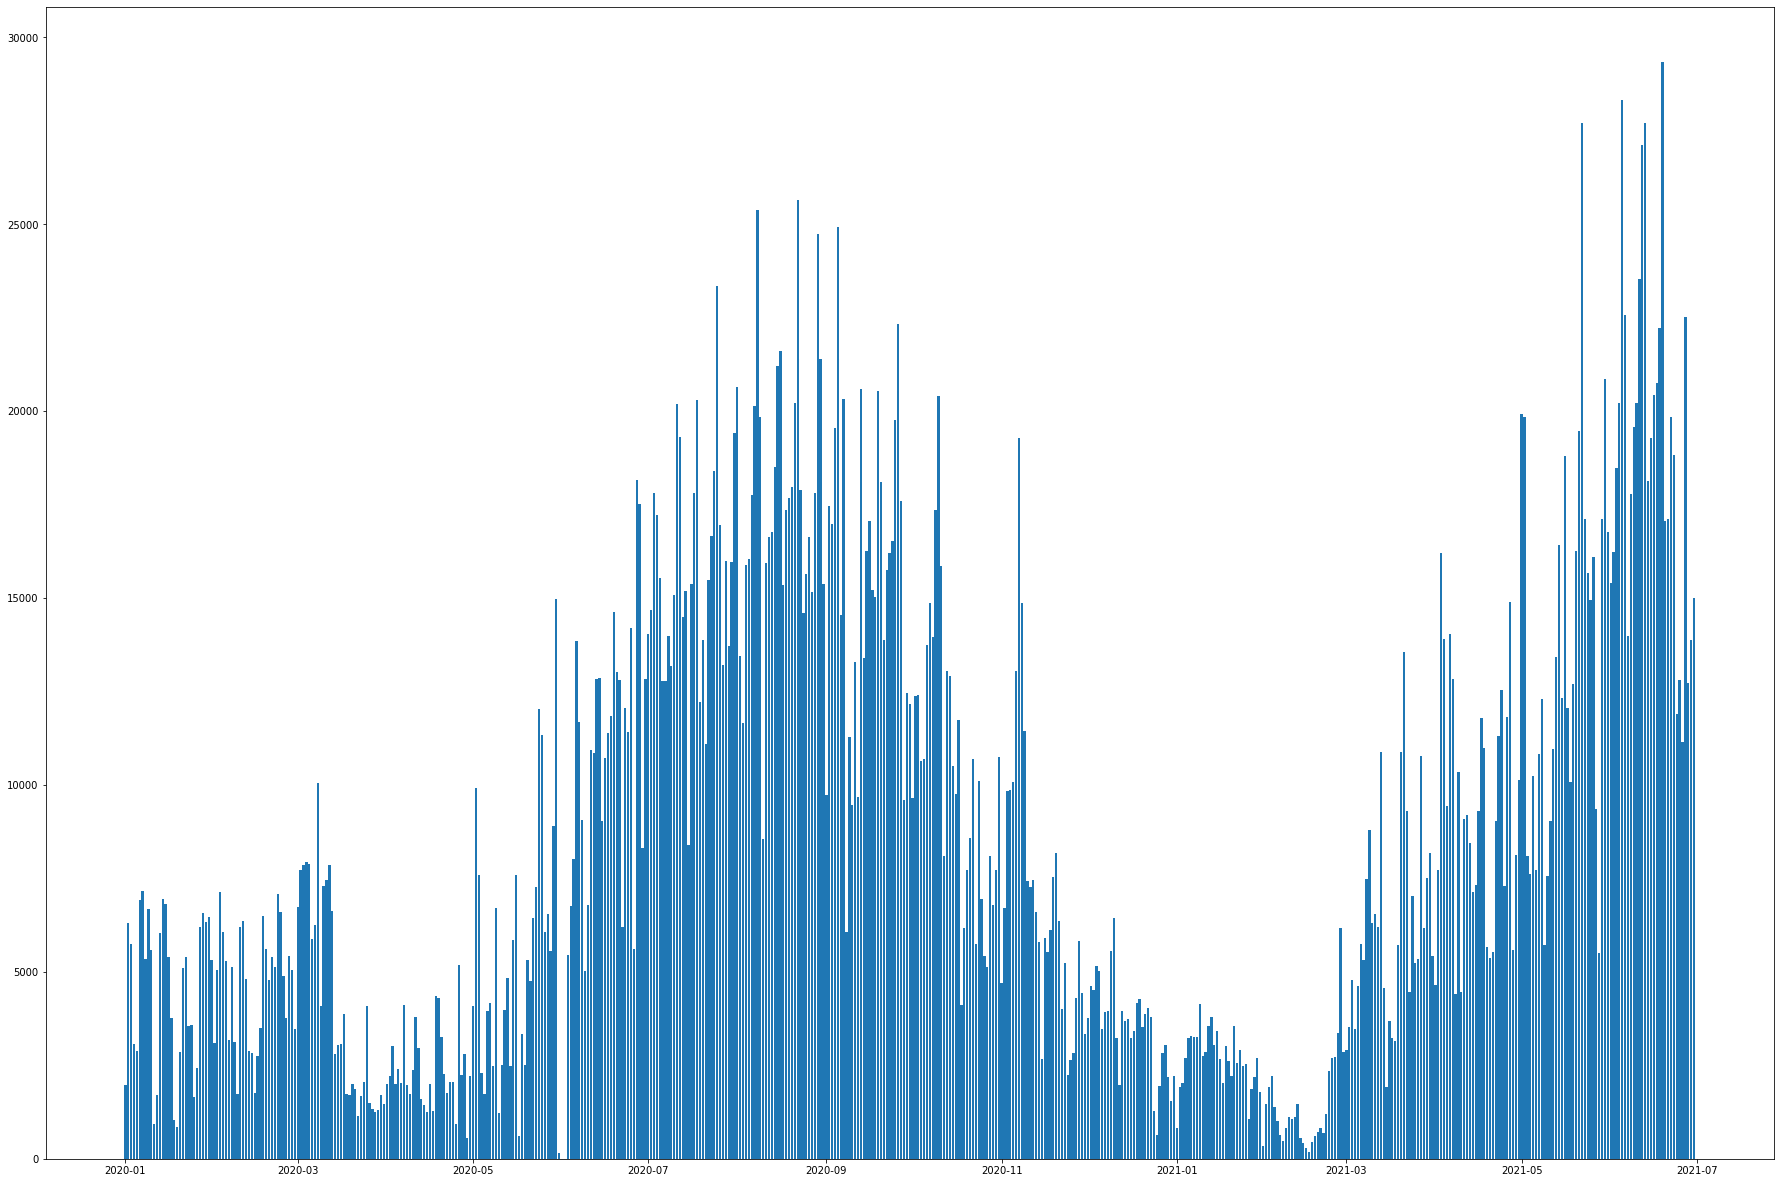

In [ ]:
# End date of riding for casual riders only

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(df_date['date'],df_date['counts'])
plt.show()

In [ ]:
# Grouping the start station for both Annual members and Casual riders

by_station = pd.Series(dff['start_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_station = by_station.rename_axis('station').reset_index(name='counts')
dff_station

,station,counts
0,2112 W Peterson Ave,1079
1,63rd St Beach,2489
2,900 W Harrison St,6299
3,Aberdeen St & Jackson Blvd,12743
4,Aberdeen St & Monroe St,10248
...,...,...
710,Woodlawn Ave & 55th St,5753
711,Woodlawn Ave & 75th St,89
712,Woodlawn Ave & Lake Park Ave,2212
713,Yates Blvd & 75th St,255


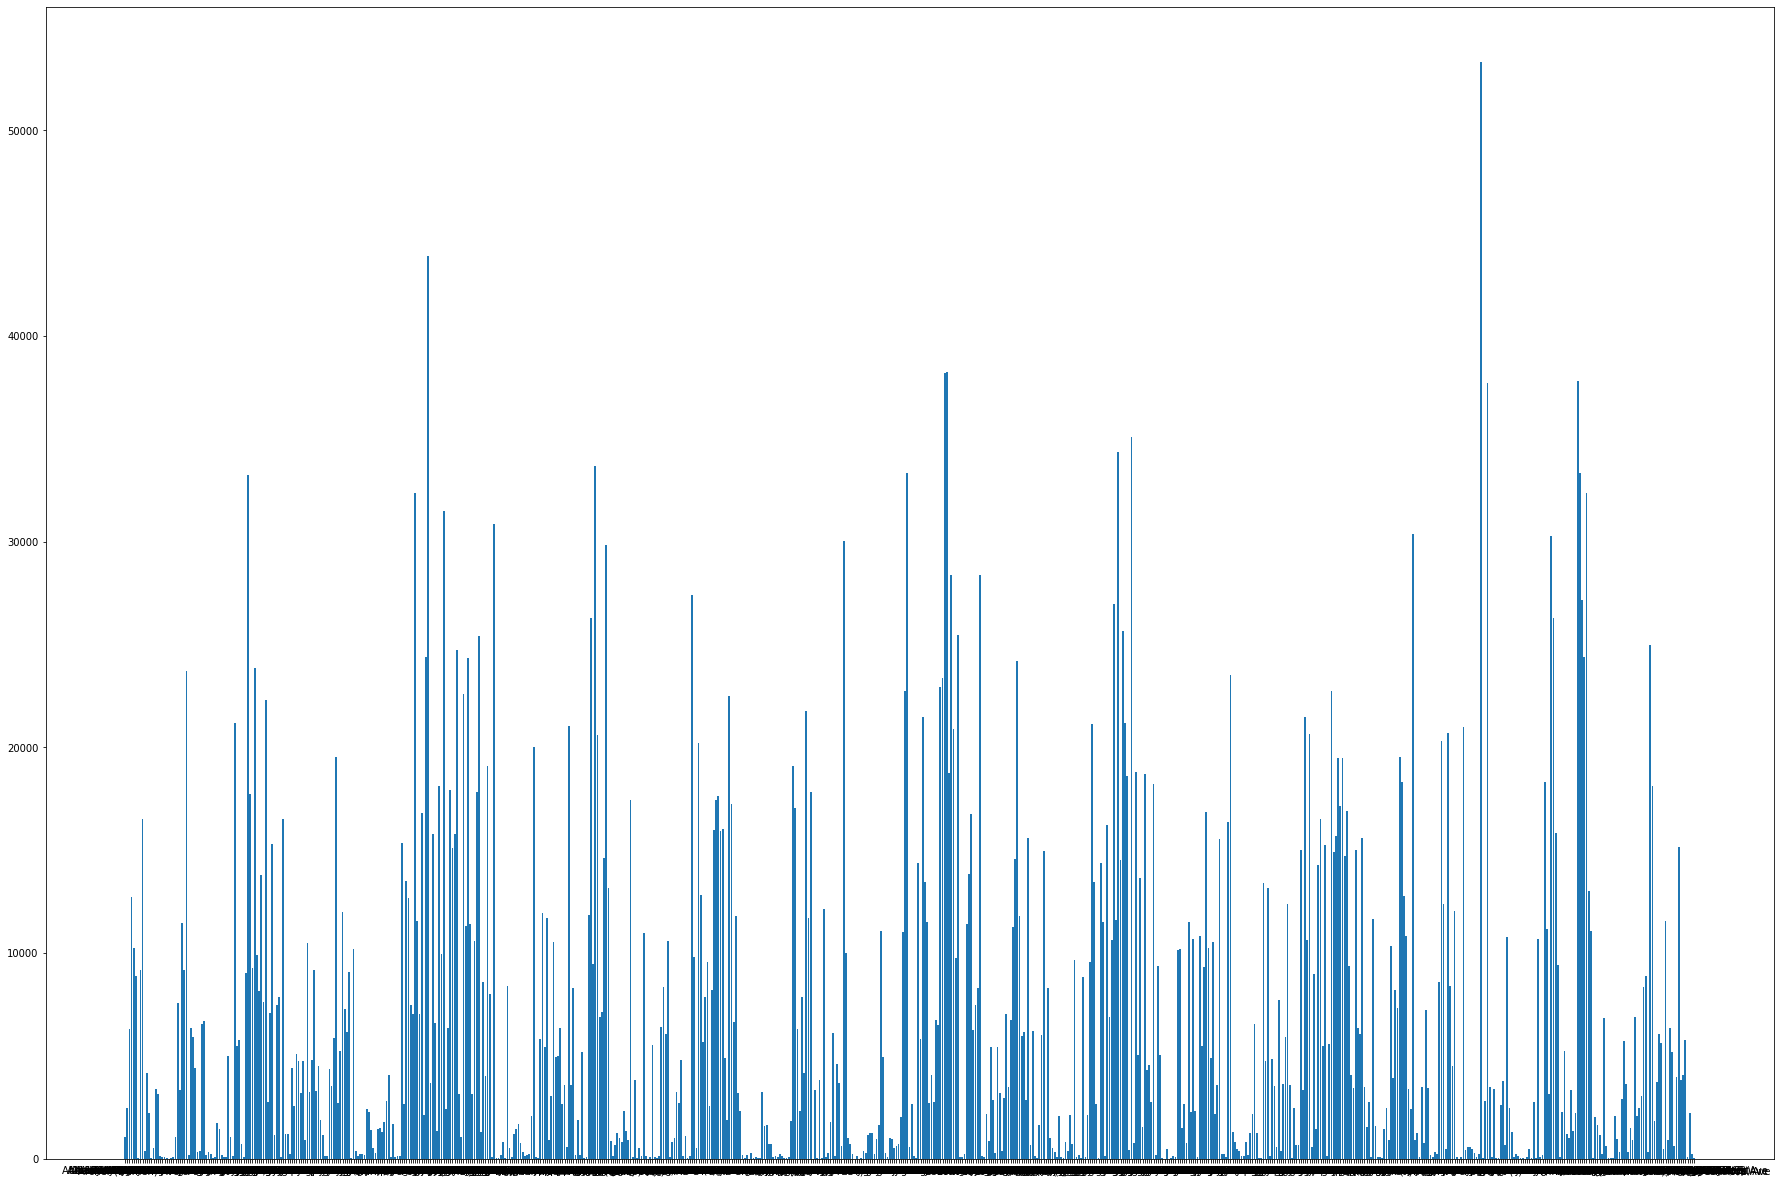

In [ ]:
# Start station for Annual members and casual riders

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [ ]:
# Grouping by end station for Annual members and Casual riders

by_station = pd.Series(dff['end_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationy = by_station.rename_axis('station').reset_index(name='counts')
dff_stationy

,station,counts
0,2112 W Peterson Ave,1222
1,63rd St Beach,2546
2,900 W Harrison St,6220
3,Aberdeen St & Jackson Blvd,12626
4,Aberdeen St & Monroe St,10442
...,...,...
711,Woodlawn Ave & 55th St,5730
712,Woodlawn Ave & 75th St,71
713,Woodlawn Ave & Lake Park Ave,2166
714,Yates Blvd & 75th St,258


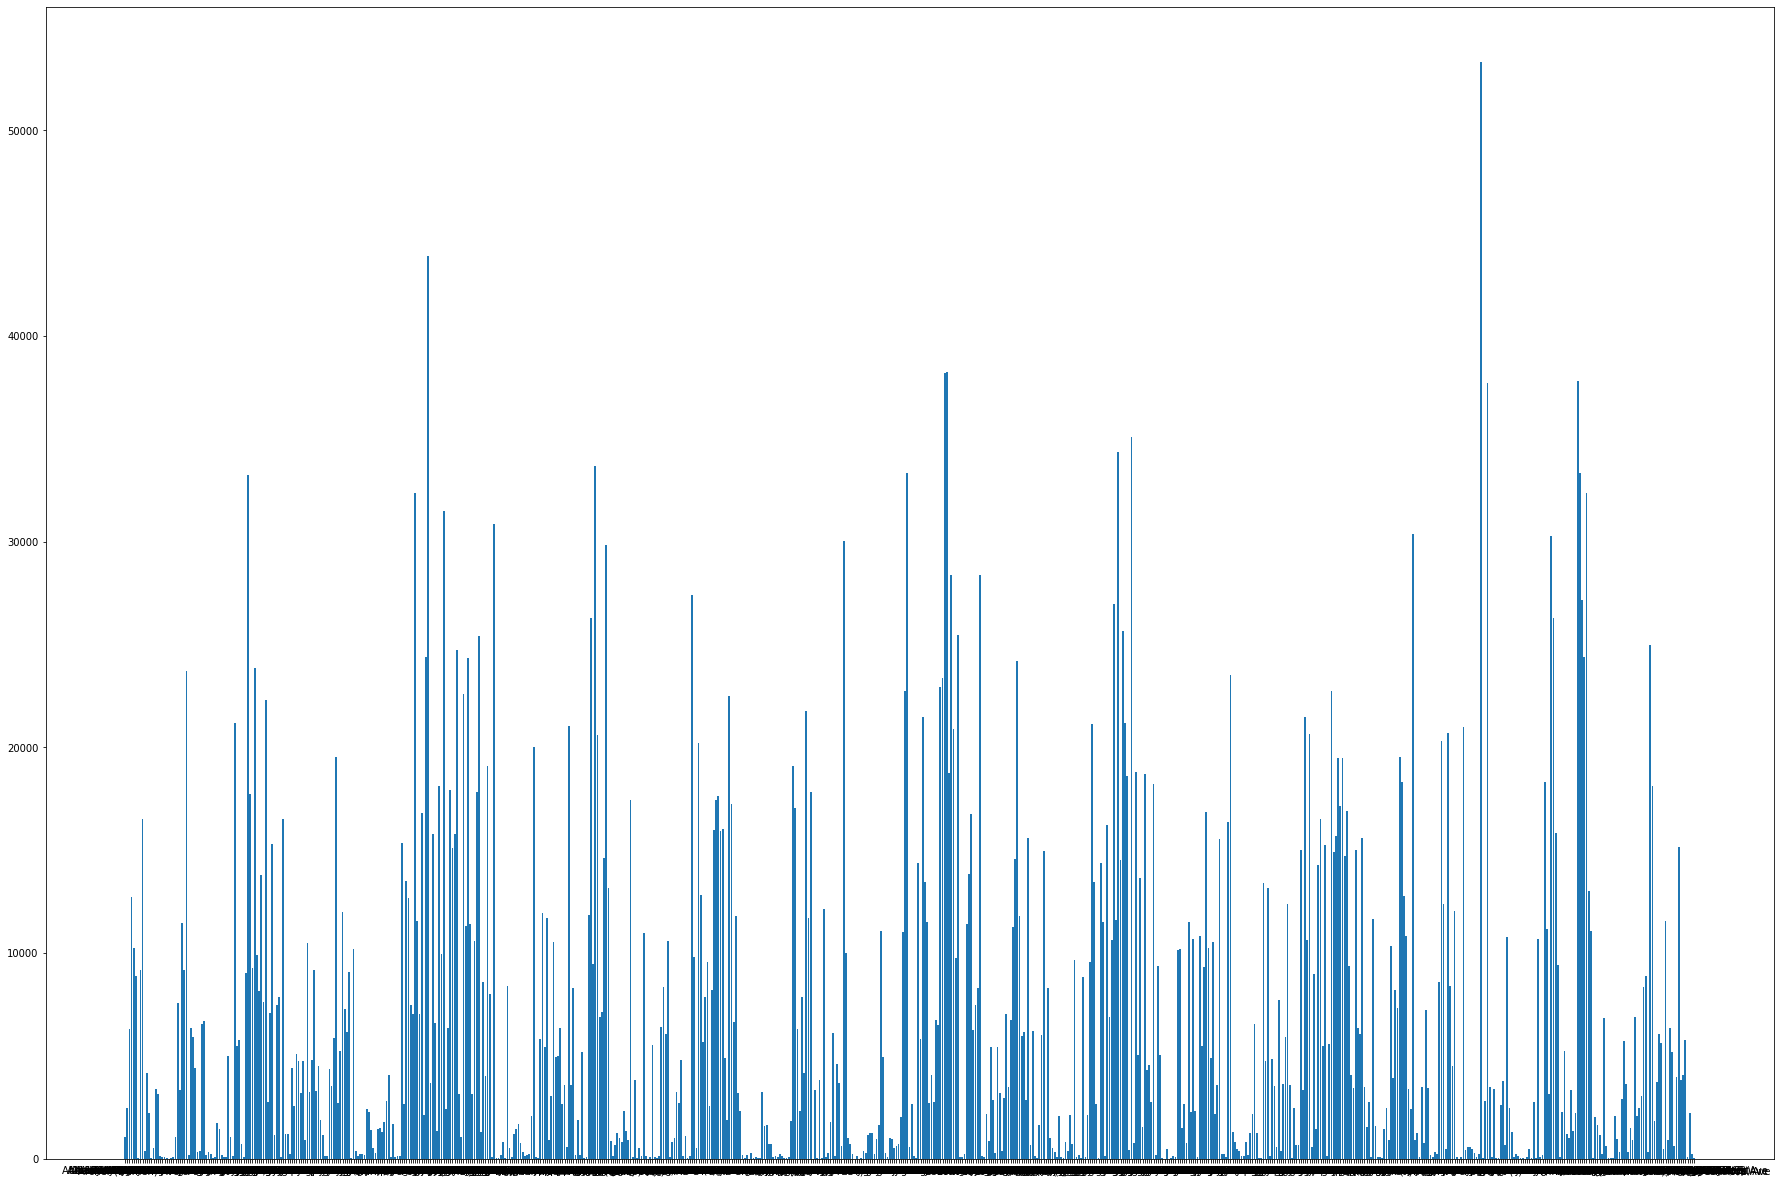

In [ ]:
# End station for Annual members and Casual riders

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [ ]:
# Grouping by start station for Annual members

by_station = pd.Series(newdff['start_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationp = by_station.rename_axis('station').reset_index(name='counts')
dff_stationp

,station,counts
0,2112 W Peterson Ave,734
1,63rd St Beach,1146
2,900 W Harrison St,4615
3,Aberdeen St & Jackson Blvd,9553
4,Aberdeen St & Monroe St,7486
...,...,...
701,Wood St & Taylor St (Temp),3637
702,Woodlawn Ave & 55th St,3601
703,Woodlawn Ave & 75th St,48
704,Woodlawn Ave & Lake Park Ave,1224


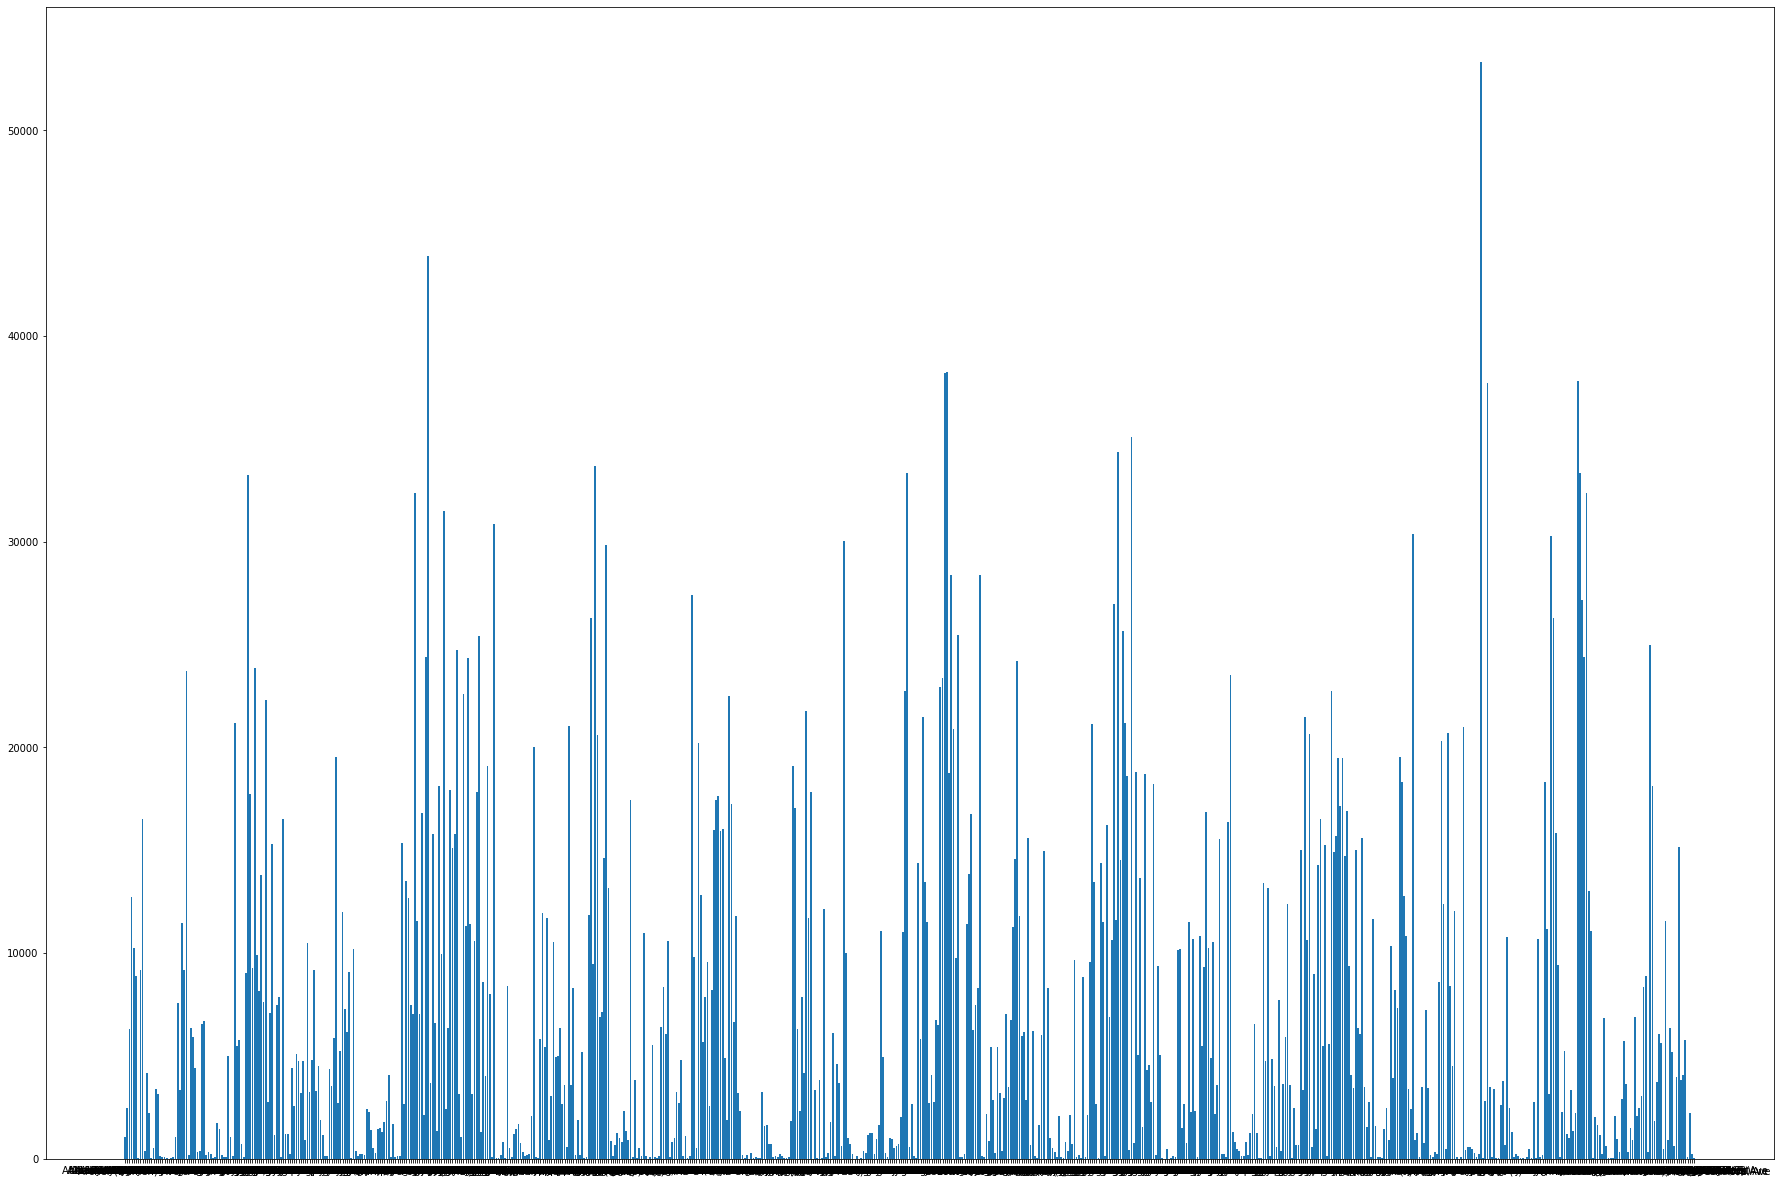

In [ ]:
# Start station for Annual members 

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [ ]:
# Grouping by end station for Annual members

by_station = pd.Series(newdff['end_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationa = by_station.rename_axis('station').reset_index(name='counts')
dff_stationa

,station,counts
0,2112 W Peterson Ave,854
1,63rd St Beach,1232
2,900 W Harrison St,4604
3,Aberdeen St & Jackson Blvd,9466
4,Aberdeen St & Monroe St,7922
...,...,...
704,Woodlawn Ave & 55th St,3637
705,Woodlawn Ave & 75th St,39
706,Woodlawn Ave & Lake Park Ave,1094
707,Yates Blvd & 75th St,92


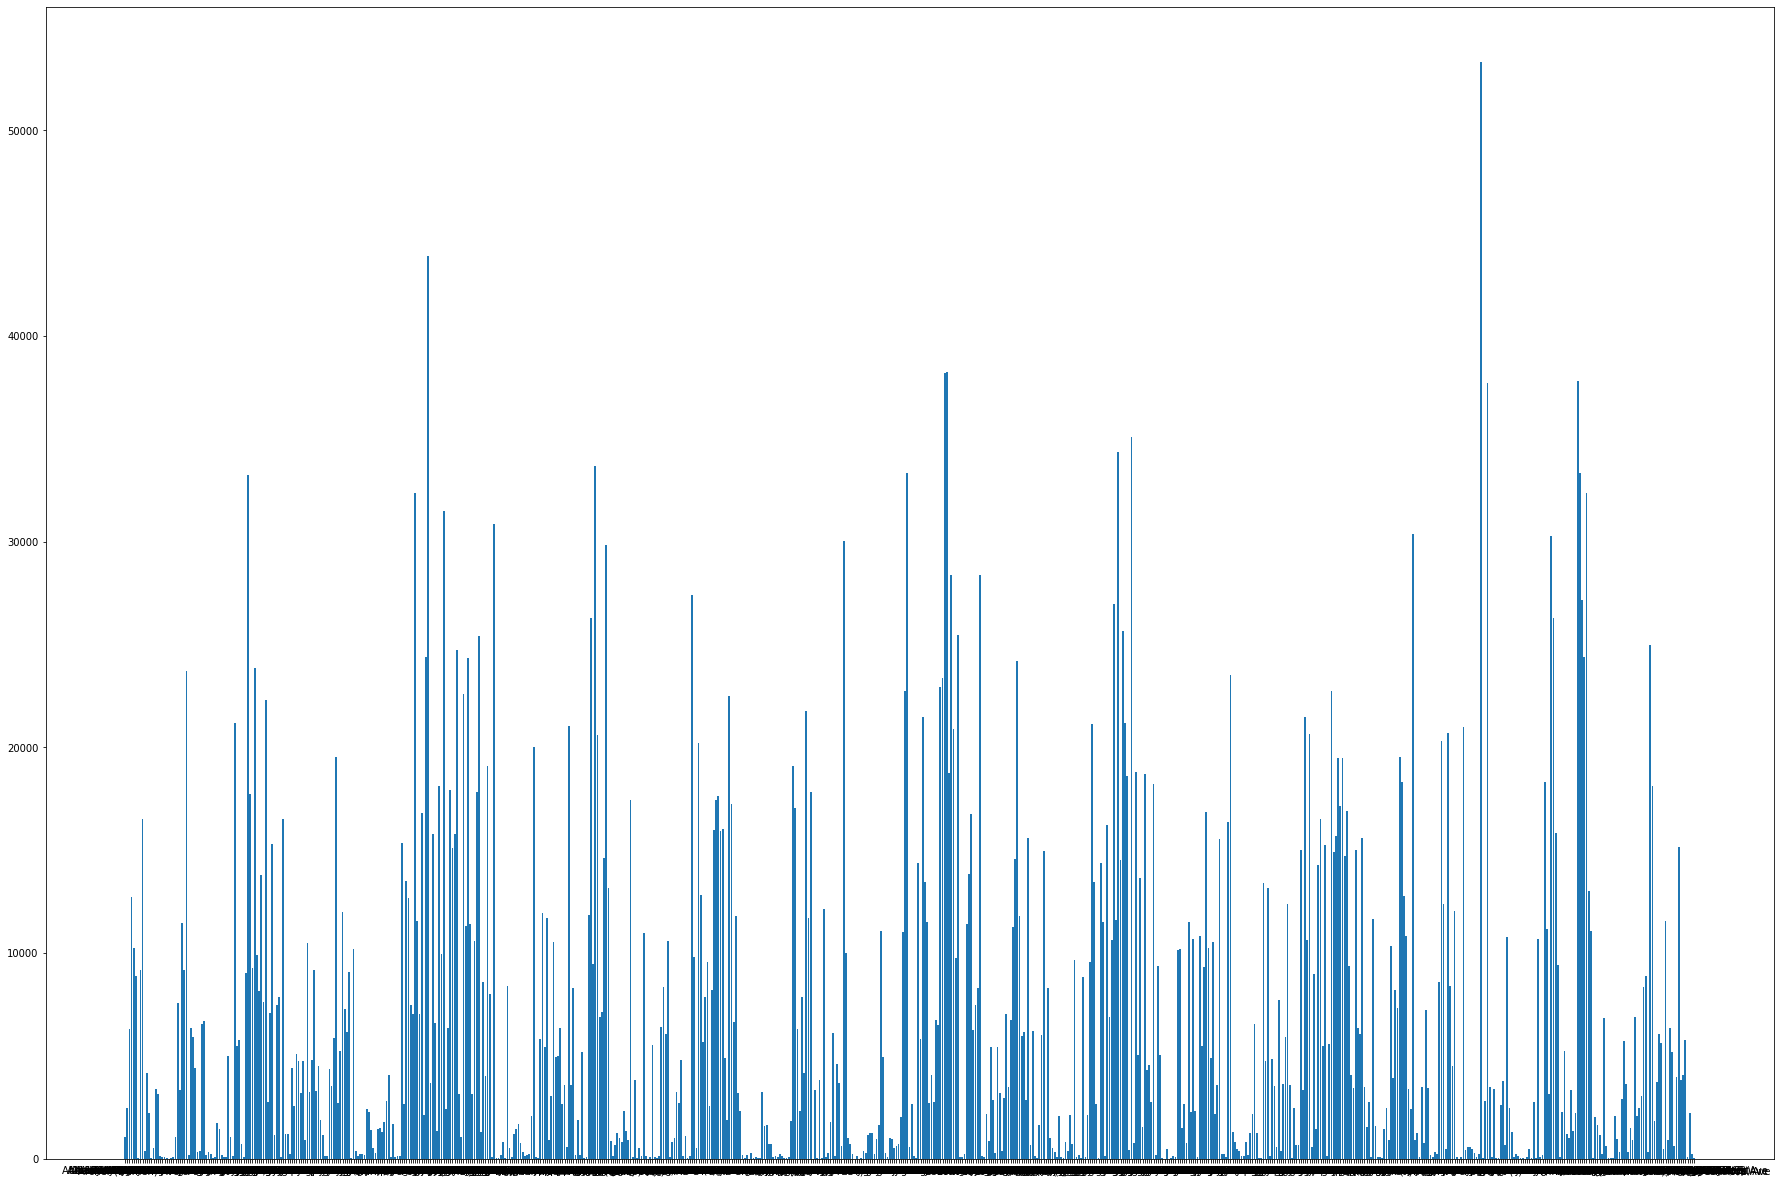

In [ ]:
# End station for Annual members

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [ ]:
# Grouping by start station for Annua Casual riders

by_station = pd.Series(newdff_casual['start_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationm = by_station.rename_axis('station').reset_index(name='counts')
dff_stationm

,station,counts
0,2112 W Peterson Ave,345
1,63rd St Beach,1343
2,900 W Harrison St,1684
3,Aberdeen St & Jackson Blvd,3190
4,Aberdeen St & Monroe St,2762
...,...,...
707,Woodlawn Ave & 55th St,2152
708,Woodlawn Ave & 75th St,41
709,Woodlawn Ave & Lake Park Ave,988
710,Yates Blvd & 75th St,152


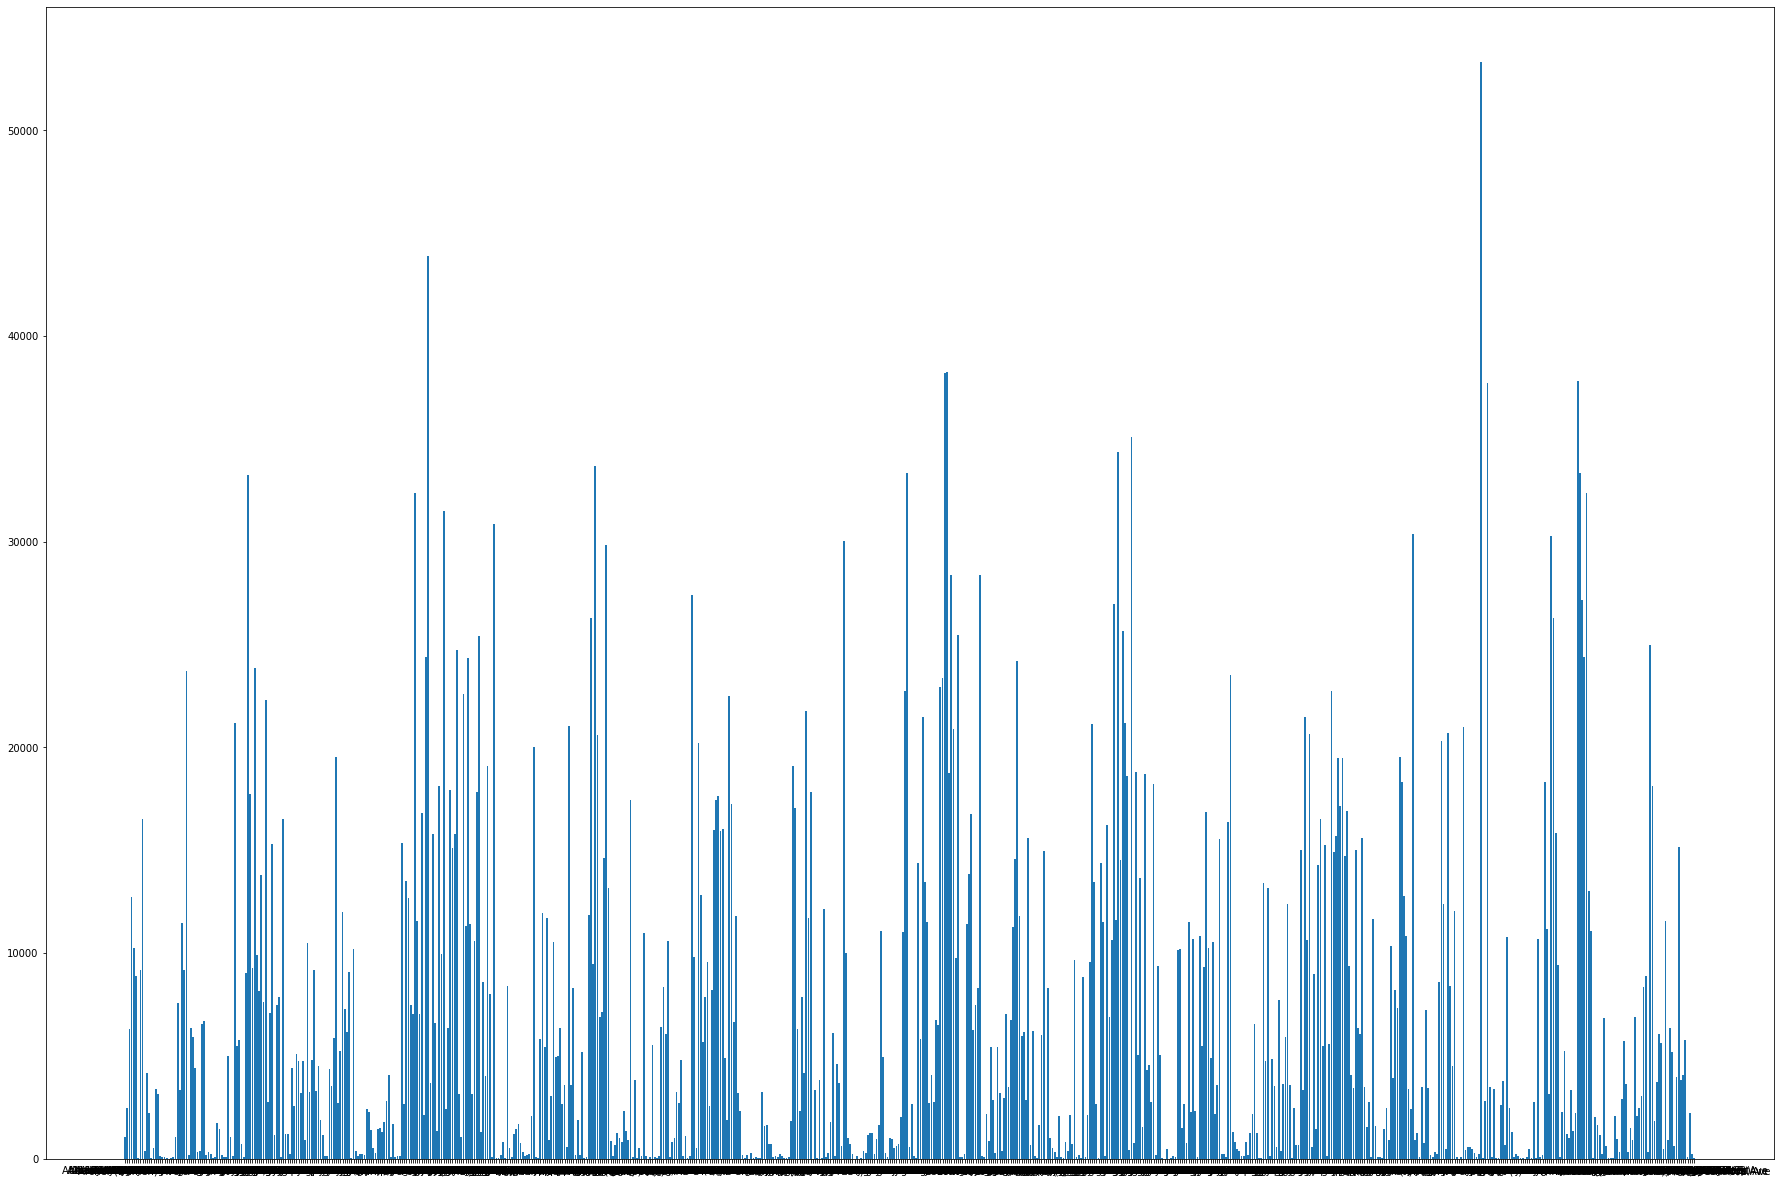

In [ ]:
# Start station for Casual riders

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [ ]:
# Grouping by end station for Casual riders

by_station = pd.Series(newdff_casual['end_station_name']).value_counts().sort_index()
by_station.index = pd.Index(by_station.index)
dff_stationoo= by_station.rename_axis('station').reset_index(name='counts')
dff_stationoo

,station,counts
0,2112 W Peterson Ave,368
1,63rd St Beach,1314
2,900 W Harrison St,1616
3,Aberdeen St & Jackson Blvd,3160
4,Aberdeen St & Monroe St,2520
...,...,...
709,Woodlawn Ave & 55th St,2093
710,Woodlawn Ave & 75th St,32
711,Woodlawn Ave & Lake Park Ave,1072
712,Yates Blvd & 75th St,166


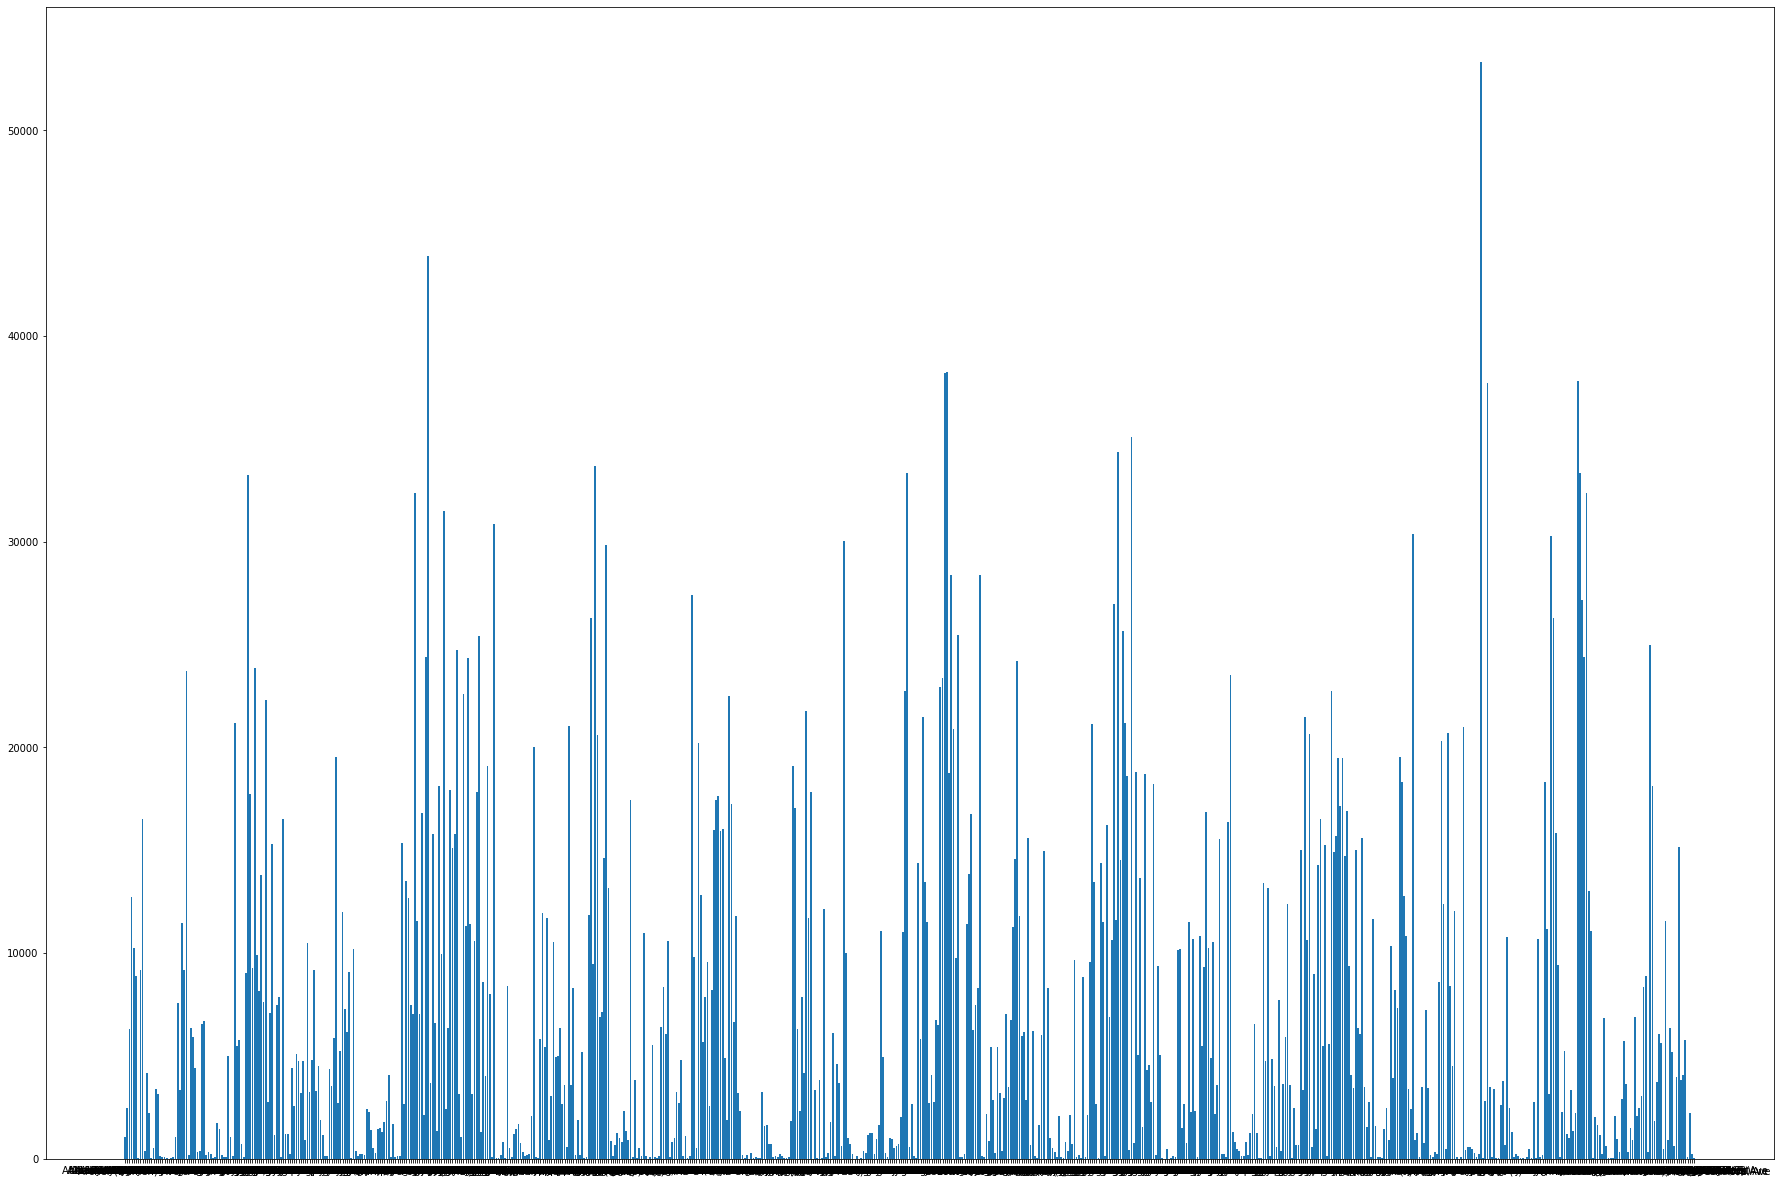

In [ ]:
# End station for Casual riders

fig= plt.figure()
ax = fig.add_axes([0,0,4,4])
ax.bar(dff_station['station'],dff_station['counts'])
plt.show()

In [ ]:
# Grouping the days of the week for Annual members and Casual riders 

by_days = pd.Series(dff['day_week_start']).value_counts().sort_index()
by_days.index = pd.Index(by_days.index)
dff_days = by_days.rename_axis('days').reset_index(name='counts')
dff_days

,days,counts
0,friday,686002
1,monday,581831
2,saturday,833136
3,sunday,706254
4,thursday,621602
5,tuesday,615493
6,wednesday,641247


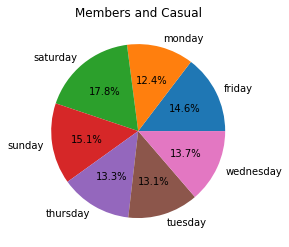

In [ ]:
# pie chart for members and casual

plt.pie(dff_days['counts'],labels=dff_days['days'],autopct='%1.1f%%')
plt.title('Members and Casual')
plt.show()

In [ ]:
# Grouping the days of the week for members only

by_days = pd.Series(newdff['day_week_start']).value_counts().sort_index()
by_days.index = pd.Index(by_days.index)
newdff_days = by_days.rename_axis('days').reset_index(name='counts')
newdff_days

,days,counts
0,friday,430723
1,monday,396422
2,saturday,419125
3,sunday,365409
4,thursday,426599
5,tuesday,431542
6,wednesday,447619


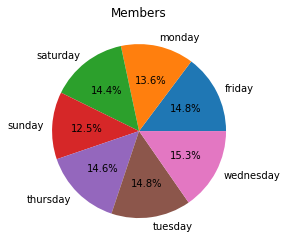

In [ ]:
# pie chart for members

plt.pie(newdff_days['counts'],labels=newdff_days['days'],autopct='%1.1f%%')
plt.title('Members')
plt.show()

In [ ]:
# Grouping the days of the week for Casual riders

by_days = pd.Series(newdff_casual['day_week_start']).value_counts().sort_index()
by_days.index = pd.Index(by_days.index)
df_causall_days = by_days.rename_axis('days').reset_index(name='counts')
df_causall_days

,days,counts
0,friday,255279
1,monday,185409
2,saturday,414011
3,sunday,340845
4,thursday,195003
5,tuesday,183951
6,wednesday,193628


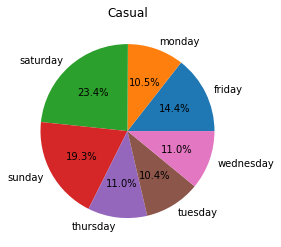

In [ ]:
# pie chart for casual riders

plt.pie(df_causall_days['counts'],labels=df_causall_days['days'],autopct='%1.1f%%')
plt.title('Casual')
plt.show()

In [ ]:
# Grouping the bikes for members and Casual

by_rides = pd.Series(dff['rideable_type']).value_counts().sort_index()
by_rides.index = pd.Index(by_rides.index)
dff_rides = by_rides.rename_axis('bikes').reset_index(name='counts')
dff_rides

,bikes,counts
0,classic_bike,1205865
1,docked_bike,2776356
2,electric_bike,703344


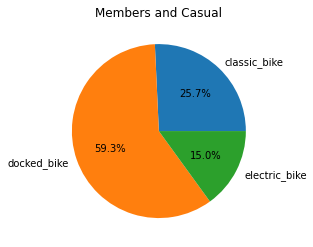

In [ ]:
# pie chart for members and casual

plt.pie(dff_rides['counts'],labels=dff_rides['bikes'],autopct='%1.1f%%')
plt.title('Members and Casual')
plt.show()

In [ ]:
# Grouping the bikes for members

by_rides = pd.Series(newdff['rideable_type']).value_counts().sort_index()
by_rides.index = pd.Index(by_rides.index)
newdff_rides = by_rides.rename_axis('bikes').reset_index(name='counts')
newdff_rides

,bikes,counts
0,classic_bike,792599
1,docked_bike,1727733
2,electric_bike,397107


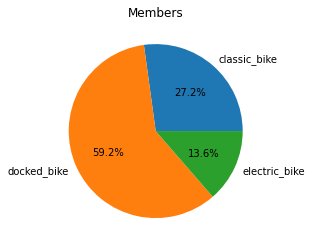

In [ ]:
# pie chart for members

plt.pie(newdff_rides['counts'],labels=newdff_rides['bikes'],autopct='%1.1f%%')
plt.title('Members')
plt.show()

In [ ]:
# Grouping the bikes for casual

by_rides = pd.Series(newdff_casual['rideable_type']).value_counts().sort_index()
by_rides.index = pd.Index(by_rides.index)
Cdff_rides = by_rides.rename_axis('bikes').reset_index(name='counts')
Cdff_rides

,bikes,counts
0,classic_bike,413266
1,docked_bike,1048623
2,electric_bike,306237


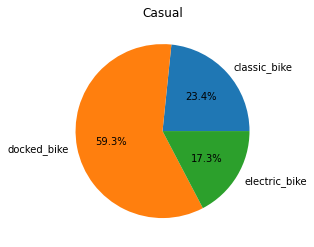

In [ ]:
# pie chart for casual

plt.pie(Cdff_rides['counts'],labels=Cdff_rides['bikes'],autopct='%1.1f%%')
plt.title('Casual')
plt.show()

# ACT

In this stage, we provide our recommendations from the analysis done above.

- My analysis has shown that Annual members riders ride on weekdays more and casual ridres on weekends meaning they ride on their leisure time. I conclude that every casual rider refuse to become members because it is dependent on their leisure time.

## Recommendations

-  Firsty, the company can ensure weekends packages to only members of the company that can encourage the casual riders to join in on the membership of the company. This packages can included he/she who is a member can book a bike for a weekend gataway with discount. This package is only accessable to members. Due to the weekends packages the casual riders would be encouraged to be annual subscribers.
- Secondly, the company can start a app/website that is only accessable to members that want to book or want the bike delivered to the house or returned to the station. This app/websites helps members that are not able to go to the station but want to use the bike later on just order it and return it. Casual riders will be encouraged to get converted to annual subscribers for taking advantage of these facilities.